# Итоговая работа по математике

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import lovelyplots as lp
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

import mplcyberpunk
plt.style.use("cyberpunk")

In [3]:
from scipy import stats
from scipy.stats import ks_2samp, ttest_ind, chi2_contingency, entropy
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, roc_auc_score, classification_report, roc_curve, auc, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Введение

В современном бизнесе предсказание годового дохода клиентов играет важную роль для оптимизации маркетинговых стратегий, управления ценообразованием, прогнозирования спроса и улучшения качества обслуживания. Именно поэтому данное исследование направлено на создание модели регрессии для прогнозирования годового дохода клиентов. Предсказание этого признака может быть полезным для бизнеса по следующим причинам:

* **Персонализация маркетинговых стратегий**: Знание дохода клиентов позволяет компаниям создавать персонализированные маркетинговые кампании, направленные на целевую аудиторию с определенным уровнем дохода. Например, можно разработать специальные предложения или скидки для клиентов с разными уровнями дохода.

* **Оптимизация ценообразования**: Зная уровень дохода клиентов, компании могут оптимизировать стратегии ценообразования, чтобы соответствовать финансовым возможностям своей аудитории. Например, можно предложить различные ценовые планы или продукты в зависимости от дохода клиента.

* **Прогнозирование спроса**: Понимание годового дохода клиентов поможет компаниям прогнозировать спрос на свои продукты или услуги. Это позволит более эффективно управлять запасами, производством и распределением товаров.

* **Улучшение качества обслуживания**: Зная доход клиентов, компании могут адаптировать свои услуги и обслуживание под их финансовые возможности, что способствует улучшению качества обслуживания и удовлетворенности клиентов.

**Цель исследования** — разработка эффективной модели регрессии, способной предсказывать годовой доход клиентов на основе имеющихся данных. Для достижения цели предполагается провести анализ датасета, оценить распределения признаков и сравнить их между группами, сформулировать и протестировать гипотезы о различиях сегментов клиентов, а также оценить модель линейной регрессии методом МНК.

Сначала будет проведен анализ датасета с помощью теории вероятностей и математической статистики, осуществлена оценка распределения признаков и выявлены различия между группами. Затем будут сформулированы и протестированы гипотезы о разнице сегментов клиентов, а в случае выявления отстающей группы предложены продуктовые гипотезы и эксперименты для улучшения показателей.

Далее перейдем к регрессионному анализу, оценим модель линейной регрессии, проведем тесты на гетероскедастичность и мультиколлинеарность, в случае нарушения предпосылок Гаусса-Маркова применим соответствующие корректировки. Будет протестировано несколько спецификаций моделей и выбрана финальная спецификация на основе критериев и метрик. 

Таким образом, данное исследование позволит проанализировать датасет о маркетинговых активностях и создать модель регрессии для предсказания годового дохода клиентов, что в свою очередь поможет компаниям оптимизировать свои стратегии маркетинга, ценообразования и обслуживания клиентов.

## Загрузка и предобработка датасета 

Датасет [Marketing Analytics](https://www.kaggle.com/datasets/jackdaoud/marketing-data/data?select=ifood_df.csv) представляет собой набор данных о маркетинговых активностях и результативности в продвижении продукции. Датасет содержит информацию о различных атрибутах, связанных с маркетинговыми кампаниями и клиентами.

Предварительно из датасета были удалены следующие признаки: суммы, потраченные на отдельные продукты, (Mnt...) стоимость контакта (Z_CostContact) и доход от него (Z_Revenue), флаги, указывающие, принимал ли клиент определенные маркетинговые компании (AcceptedCmp1-5).

Описание признаков:
   - ID: Уникальный идентификатор клиента.
   - Income: Годовой доход клиента.
   - Kidhome: Количество детей в возрасте до 18 лет, проживающих в доме клиента.
   - Teenhome: Количество детей в возрасте от 18 до 25 лет, проживающих в доме клиента.
   - Recency: Количество дней с момента последней покупки.
   - NumDealsPurchases: Количество покупок, совершенных во время акций или специальных предложений.
   - NumWebPurchases: Количество покупок, совершенных через веб-сайт.
   - NumCatalogPurchases: Количество покупок, совершенных через каталог.
   - NumStorePurchases: Количество покупок, совершенных в магазине.
   - NumWebVisitsMonth: Количество посещений веб-сайта в месяц.
   - Complain: Флаг жалобы клиента.
   - Response: Флаг ответа клиента на маркетинговую кампанию.
   - Age: Возраст клиента.
   - marital_...: Флаги, указывающие на семейное положение клиента.
   - education_...: Флаги, указывающие на уровень образования клиента.
   - MntTotal: Общая сумма потраченных денег.
   - MntRegularProds: Сумма, потраченная на обычные продукты без учета акций и скидок.
   - AcceptedCmpOverall: Общее количество принятых маркетинговых компаний.

В качестве **целевой переменной** выбран **годовой доход клиента** (Income). 

In [5]:
data = pd.read_csv('marketing_data.csv')

In [6]:
display(data.head(10))

Income  Kidhome  Teenhome  Recency  NumDealsPurchases  NumWebPurchases   
0  58138.0        0         0       58                  3                8  \
1  46344.0        1         1       38                  2                1   
2  71613.0        0         0       26                  1                8   
3  26646.0        1         0       26                  2                2   
4  58293.0        1         0       94                  5                5   
5  62513.0        0         1       16                  2                6   
6  55635.0        0         1       34                  4                7   
7  33454.0        1         0       32                  2                4   
8  30351.0        1         0       19                  1                3   
9   5648.0        1         1       68                  1                1   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  ...   
0                   10                  4                  7         0  ...  \
1                    1                  2                  5         0  ...   
2                    2                 10                  4         0  ...   
3                    0                  4                  6         0  ...   
4                    3                  6                  5         0  ...   
5                    4                 10                  6         0  ...   
6                    3                  7                  6         0  ...   
7                    0                  4                  8         0  ...   
8                    0                  2                  9         0  ...   
9                    0                  0                 20         0  ...   

   marital_Together  marital_Widow  education_2n Cycle  education_Basic   
0                 0              0                   0                0  \
1                 0              0                   0                0   
2                 1              0                   0                0   
3                 1              0                   0                0   
4                 0              0                   0                0   
5                 1              0                   0                0   
6                 0              0                   0                0   
7                 0              0                   0                0   
8                 1              0                   0                0   
9                 1              0                   0                0   

   education_Graduation  education_Master  education_PhD  MntTotal   
0                     1                 0              0      1529  \
1                     1                 0              0        21   
2                     1                 0              0       734   
3                     1                 0              0        48   
4                     0                 0              1       407   
5                     0                 1              0       702   
6                     1                 0              0       563   
7                     0                 0              1       146   
8                     0                 0              1        44   
9                     0                 0              1        36   

   MntRegularProds  AcceptedCmpOverall  
0             1441                   0  
1               15                   0  
2              692                   0  
3               43                   0  
4              392                   0  
5              688                   0  
6              536                   0  
7              123                   0  
8               42                   0  
9               23                   1  

[10 rows x 25 columns]

In [7]:
print(f'Размер датасета: {data.shape}')

Размер датасета: (2205, 25)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   NumDealsPurchases     2205 non-null   int64  
 5   NumWebPurchases       2205 non-null   int64  
 6   NumCatalogPurchases   2205 non-null   int64  
 7   NumStorePurchases     2205 non-null   int64  
 8   NumWebVisitsMonth     2205 non-null   int64  
 9   Complain              2205 non-null   int64  
 10  Response              2205 non-null   int64  
 11  Age                   2205 non-null   int64  
 12  marital_Divorced      2205 non-null   int64  
 13  marital_Married       2205 non-null   int64  
 14  marital_Single        2205 non-null   int64  
 15  marital_Together     

In [9]:
# Переводим столбец 'Income' в тип int64
data['Income'] = data['Income'].astype('int64')

In [10]:
data.describe().style.background_gradient()

In [11]:
percentage_missing = data.isnull().sum().sum() / (data.shape[0] * data.shape[1]) * 100
print(f"Доля пустых значений в датасете: {percentage_missing:.1f}%")

Доля пустых значений в датасете: 0.0%


In [12]:
print('Количество уникальных значений в каждом столбце:')
data.nunique()

Количество уникальных значений в каждом столбце:


Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
Complain                   2
Response                   2
Age                       56
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Master           2
education_PhD              2
MntTotal                 897
MntRegularProds          974
AcceptedCmpOverall         5
dtype: int64

# 📍 Разведочный анализ данных

In [13]:
text1_lineplot = """
Cредняя сумма покупок имеет тенденцию к увеличению с возрастом клиентов. 
Это может указывать на то, что более старшие клиенты склонны тратить 
больше денег на покупки. Также мы видим, что клиенты в возрасте около 25 
также в среднем тратят больше других возрастных групп."""

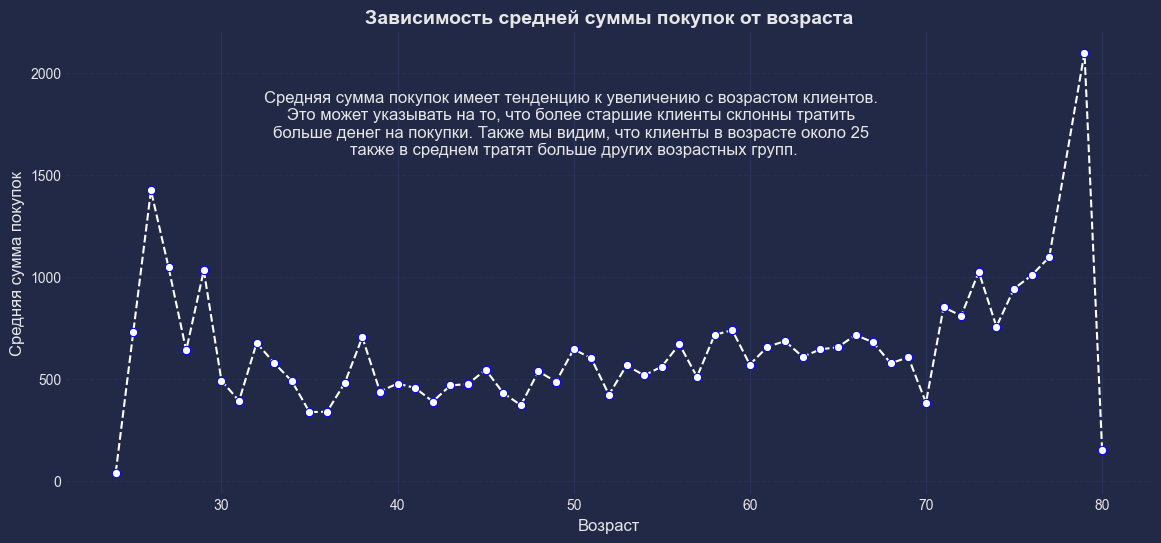

In [14]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='Age', y='MntTotal', data=data, estimator='mean', 
             marker='o', color='white', linestyle='--', errorbar=None, markeredgecolor='blue')
plt.title('Зависимость cредней суммы покупок от возраста', fontweight='bold', fontsize=14)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Средняя сумма покупок', fontsize=12)
plt.text(50, 1600, text1_lineplot, fontsize=12, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [15]:
text2_lineplot = """C увеличением периода с последней покупки общая сумма покупок снижается.
Но в большинстве изменчивость в данных не сильно велика, что может указывать на 
схожие покупательские поведения в зависимости от времени с момента последней покупки"""

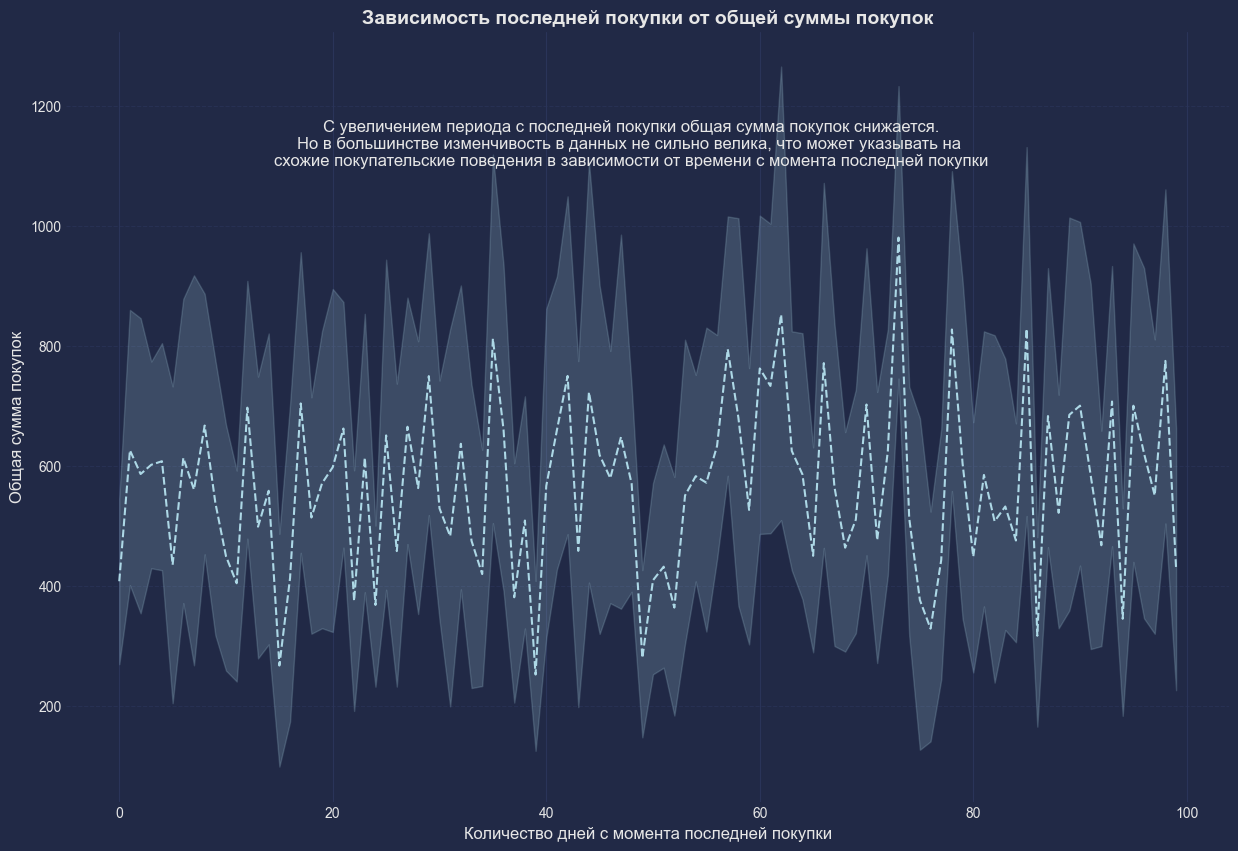

In [16]:
plt.figure(figsize=(15, 10))
sns.lineplot(x='Recency', y='MntTotal', data=data, color='lightblue', linestyle='--')
plt.title('Зависимость последней покупки от общей суммы покупок', fontweight='bold', fontsize=14)
plt.xlabel('Количество дней с момента последней покупки', fontsize=12)
plt.ylabel('Общая сумма покупок', fontsize=12)
plt.text(48, 1100, text2_lineplot, fontsize=12, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

In [17]:
# Подсчет количества детей Kidhome и Teenhome для каждого уровня образования
kidhome_counts = [data[data['education_2n Cycle'] == 1]['Kidhome'].sum(), 
                  data[data['education_Basic'] == 1]['Kidhome'].sum(),
                  data[data['education_Graduation'] == 1]['Kidhome'].sum(),
                  data[data['education_Master'] == 1]['Kidhome'].sum(),
                  data[data['education_PhD'] == 1]['Kidhome'].sum()]

teenhome_counts = [data[data['education_2n Cycle'] == 1]['Teenhome'].sum(), 
                   data[data['education_Basic'] == 1]['Teenhome'].sum(),
                   data[data['education_Graduation'] == 1]['Teenhome'].sum(),
                   data[data['education_Master'] == 1]['Teenhome'].sum(),
                   data[data['education_PhD'] == 1]['Teenhome'].sum()]

education_levels = ['Получение магистрской степени', 'Базовое образование', 'Высшее образование', 'Магистерская степень', 'Доктор наук']

In [18]:
text_barplot = """
Клиенты с высшим образованием имеют больше детей по сравнению с другими уровнями образования. В группах клиентов с высшим образованием 
и академической степенью детей от 18 до 25 лет больше, чем детей несовершеннолетних, что, вероятно, связано с возрастом клиентов. 
"""

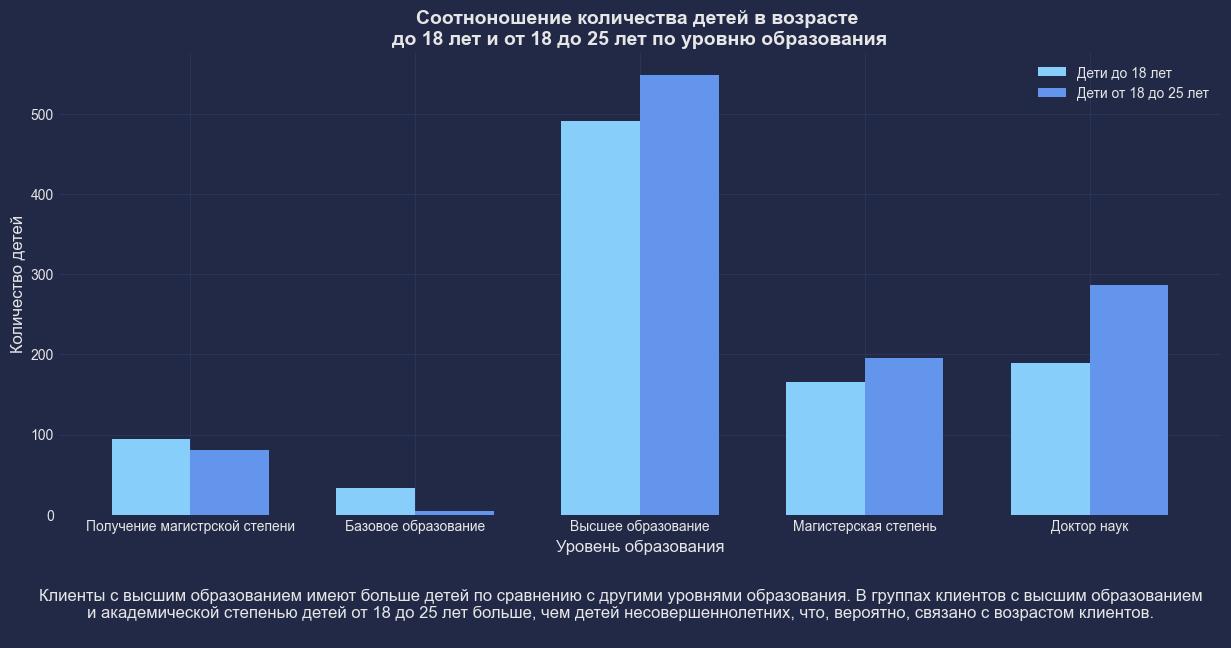

In [19]:
fig, ax = plt.subplots(figsize=(15, 6))
bar_width = 0.35
index = range(len(education_levels))

bar1 = ax.bar(index, kidhome_counts, bar_width, label='Дети до 18 лет', color='lightskyblue')
bar2 = ax.bar([i + bar_width for i in index], teenhome_counts, bar_width, label='Дети от 18 до 25 лет', color='cornflowerblue')

ax.set_xlabel('Уровень образования', fontsize=12)
ax.set_ylabel('Количество детей', fontsize=12)
ax.set_title('Соотноношение количества детей в возрасте \nдо 18 лет и от 18 до 25 лет по уровню образования', fontweight='bold', fontsize=14)
plt.text(2.1, -150, text_barplot, fontsize=12, ha='center')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(education_levels)
ax.legend()

plt.show()

In [20]:
text_boxplot = """
Средний общий доход у людей со статусом «Вдовец/Вдова» выше, чем у других категорий семейного положения.
Медианное значение для категории «Вдовец/Вдова» смещено к нижнему квартилю, что может указывать 
на то, что большинство значений в этой группе находится на более низком уровне дохода.
Люди, состоящие в браке или в гражданском браке, имеют примерно одинаковый средний общий доход.
Люди со статусом «Одинокий/Одинокая» имеют самый низкий средний общий доход среди всех категорий.
Средний доход в группе людей в разводе невысок, есть отдельные наблюдения с высокими доходами.
Можно сделать вывод о том, что статус семейного положения влияет на уровень дохода, различия 
в доходах между группами статусов семейного положения заметны.
"""

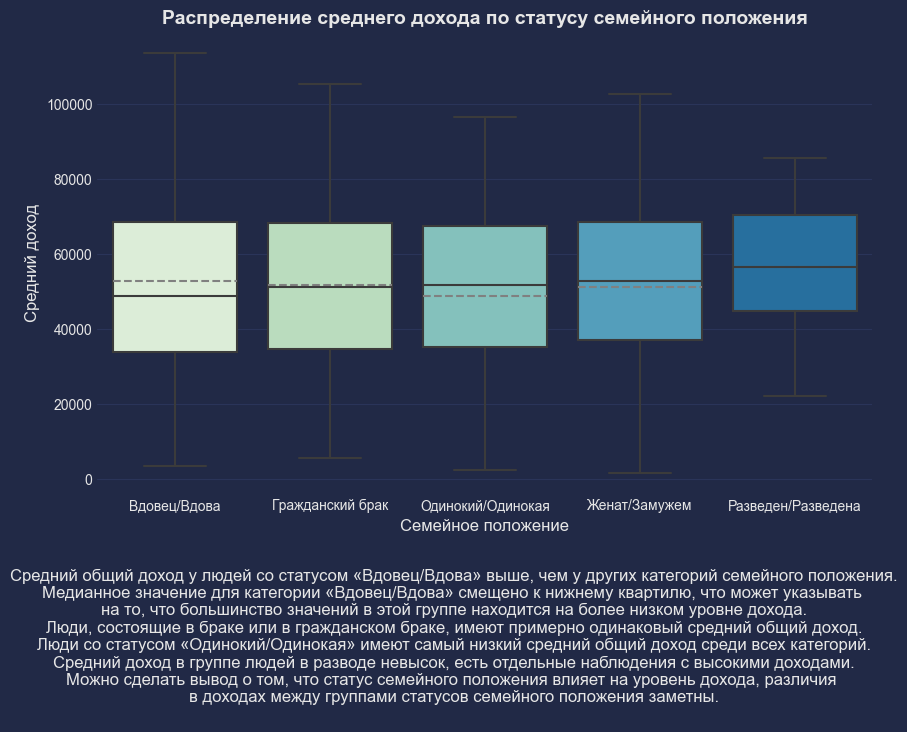

In [21]:
data['Marital_Status'] = data[['marital_Widow', 'marital_Together', 'marital_Single', 'marital_Married', 'marital_Divorced']].idxmax(axis=1).str.replace('marital_', '')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital_Status', y='Income', data=data, palette='GnBu')

# Добавляем линии для квартилей
medians = data.groupby('Marital_Status')['Income'].median()
for i in range(len(medians)):
    plt.hlines(medians[i], i-0.4, i+0.4, colors='grey', linestyles='--') # Линии для медиан

plt.title('Распределение среднего дохода по статусу семейного положения', fontweight='bold', fontsize=14)
plt.xlabel('Семейное положение', fontsize=12)
plt.ylabel('Средний доход', fontsize=12)
plt.text(1.8, -64000, text_boxplot, fontsize=12, ha='center')
plt.xticks(range(len(medians)), ['Вдовец/Вдова', 'Гражданский брак', 'Одинокий/Одинокая', 'Женат/Замужем', 'Разведен/Разведена']) 
plt.show()

del data['Marital_Status']

In [22]:
text_pie = """
Большинство клиентов имеют высшее образование и академическую степень. 
Доля клиентов с базовым уровнем образования невелика."""

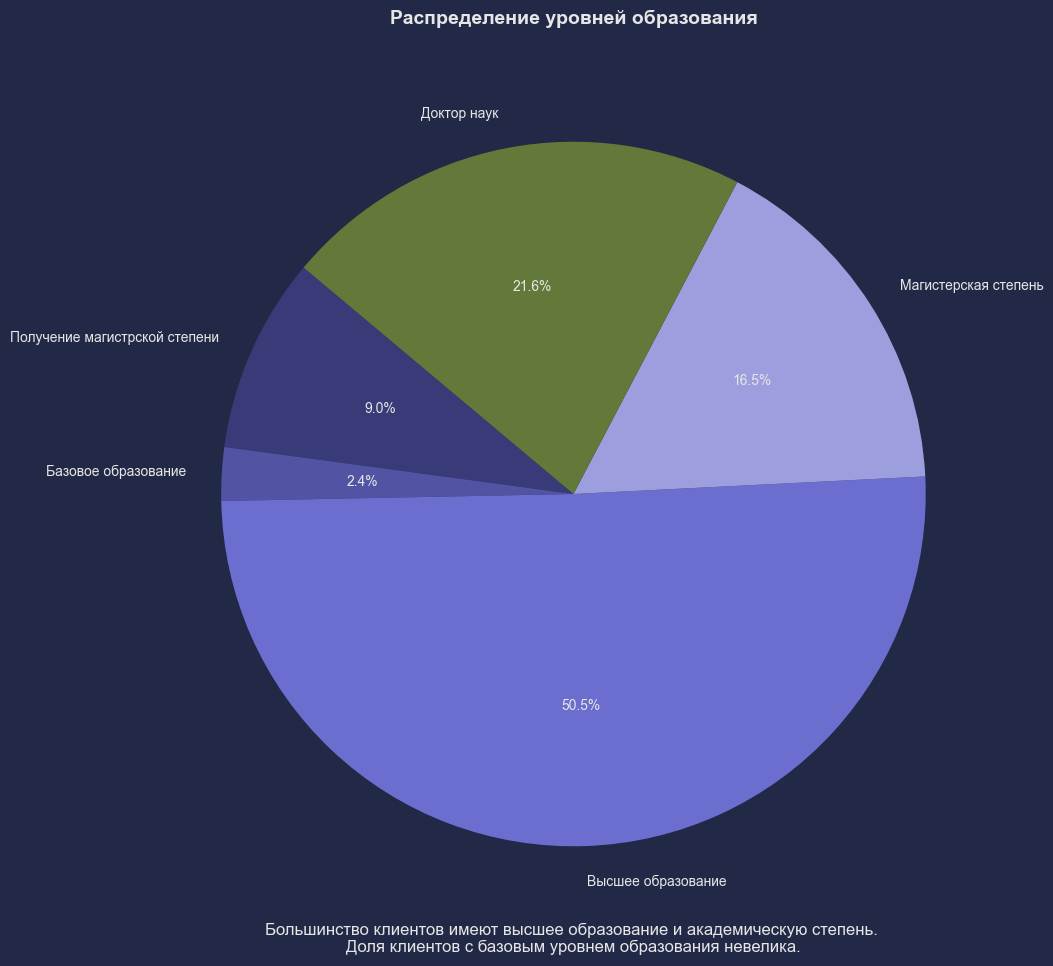

In [23]:
# Создание списка суммарных значений для каждого уровня образования
education_counts = [data['education_2n Cycle'].sum(), data['education_Basic'].sum(), data['education_Graduation'].sum(), data['education_Master'].sum(), data['education_PhD'].sum()]

# Метки для каждого сегмента
labels = ['Получение магистрской степени', 'Базовое образование', 'Высшее образование', 'Магистерская степень', 'Доктор наук']

colors = plt.cm.tab20b.colors

plt.figure(figsize=(10, 12))
plt.pie(education_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Распределение уровней образования', fontweight='bold', fontsize=14)
plt.text(0, -1.3, text_pie, fontsize=12, ha='center')
plt.axis('equal') 
plt.show()

In [24]:
text_scatter = """
На графике видна положительная корреляция между доходом 
и общей суммой покупок: чем выше доход клиента, тем 
больше он тратит на покупки. Есть некоторое количество 
выбросов, где клиенты с низким доходом делают 
значительные покупки или наоборот."""

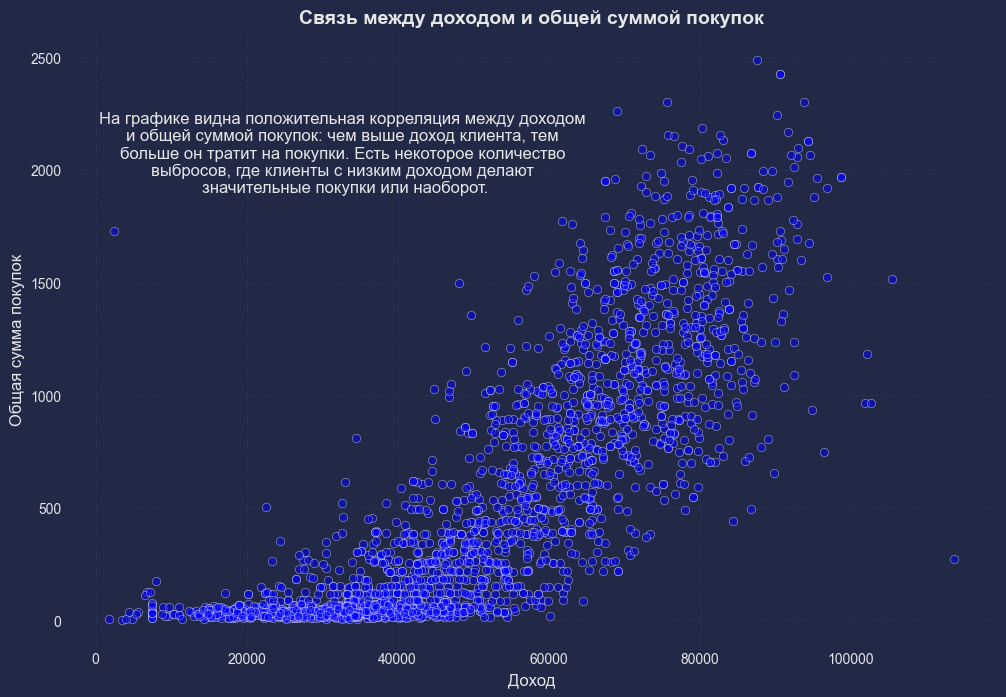

In [25]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', y='MntTotal', data=data, color='blue', edgecolors='lightblue', alpha=0.5)
plt.title('Связь между доходом и общей суммой покупок', fontweight='bold', fontsize=14)
plt.xlabel('Доход', fontsize=12)
plt.ylabel('Общая сумма покупок', fontsize=12)
plt.text(33000, 1900, text_scatter, fontsize=12, ha='center')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [26]:
text_heatmap = """
Уровень дохода имеет высокую связь с тратами на обычные продукты без учета акций и скидок и общей суммой потраченных денег.
Также уровень дохода имеет коррелирует с количеством покупок, совершенными через каталог и в магазине. Отрицательная корреляция
целевой переменной наблюдается у таких признаков как количество посещений веб-сайта в месяц и количество детей до 18 лет. 
Слабую взаимосвязь можно видеть с уровнем образования (за исключение базового образования) и количеством дней с последней покупки. 
Стоит также заметить, что сумма, потраченная на обычные продукты без учета акций и скидок, очень сильно коррелирует с общей суммой потраченных денег.
"""

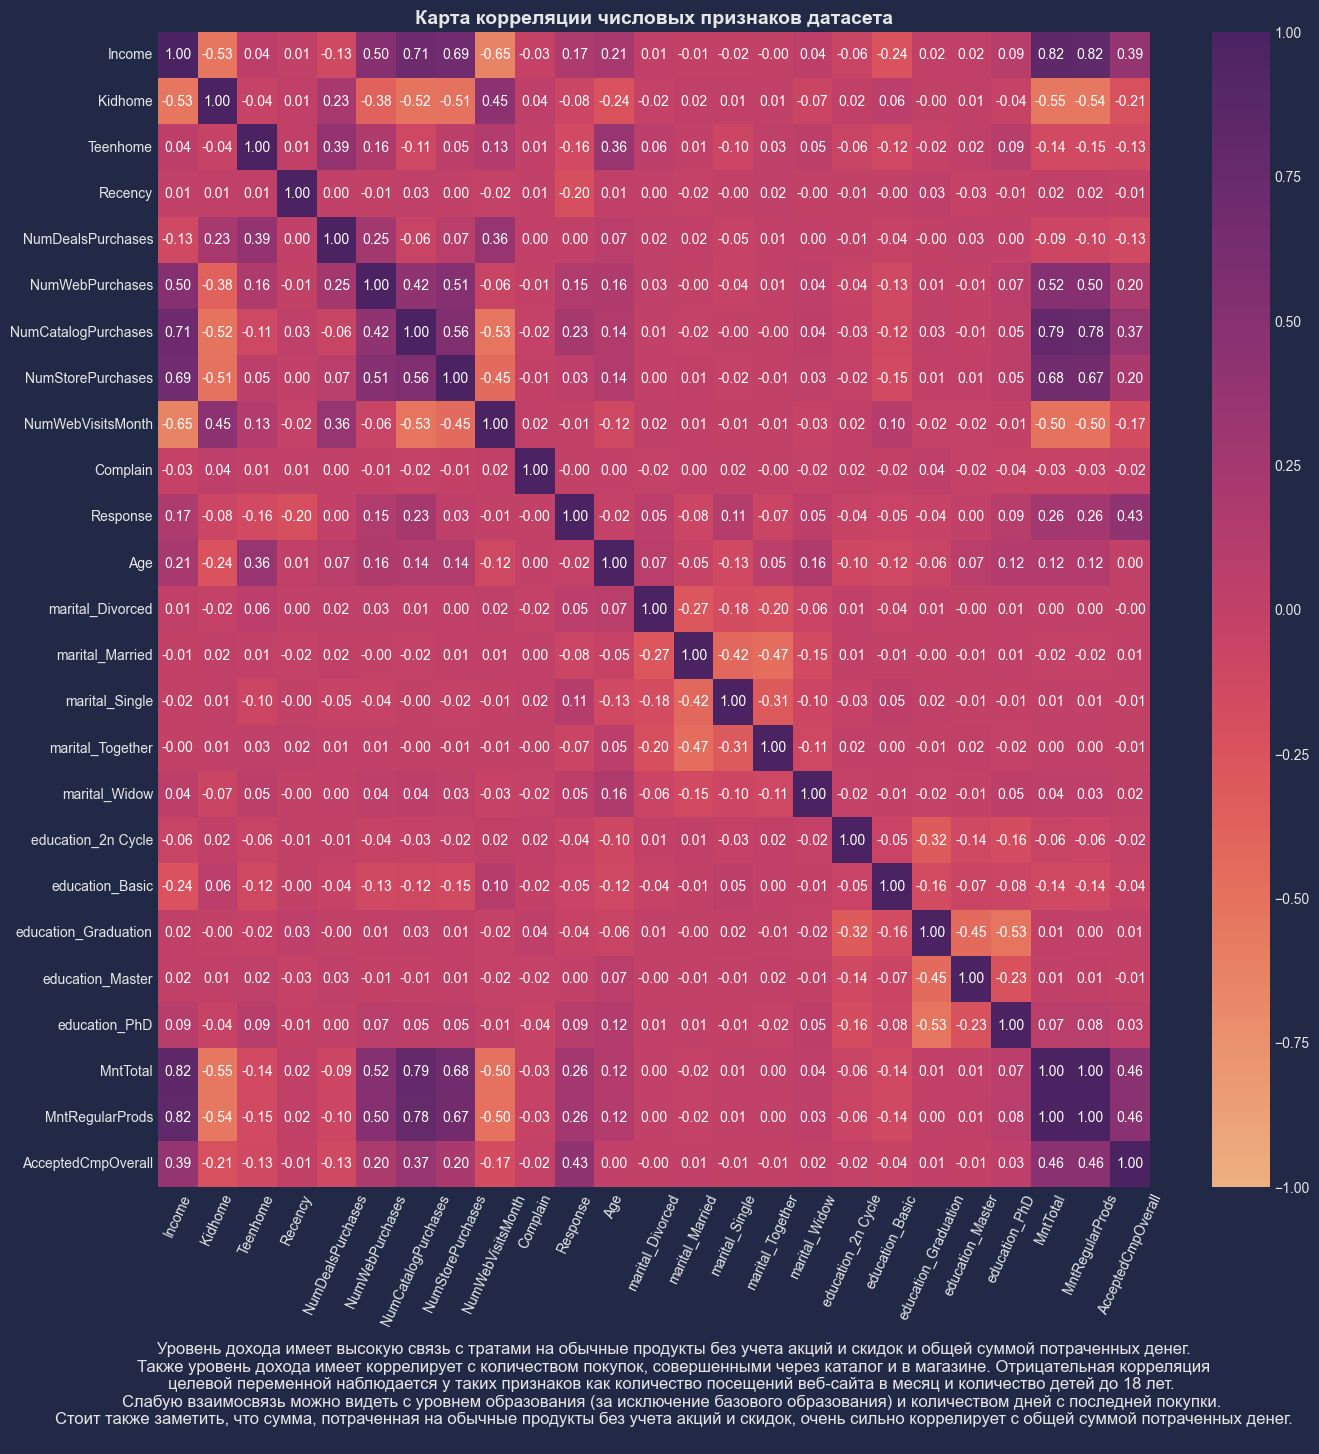

In [27]:
plt.figure(figsize=(16, 15))
sns.heatmap(data.corr(), annot=True, cmap='flare', fmt=".2f", vmin=-1, vmax=1)
plt.title('Карта корреляции числовых признаков датасета', fontweight='bold', fontsize=14)
plt.xticks(rotation=65)
plt.text(13, 30.5, text_heatmap, fontsize=12, ha='center')
plt.show()

# 📍 Статистический анализ 

In [28]:
# Создаем гистограмму с оценкой плотности
fig = px.histogram(data_frame=data, x='Income', nbins=30, color_discrete_sequence=['indigo'])
fig.update_layout(title='Распределение дохода', title_font=dict(size=16, family='Arial', color='black'),
                  xaxis_title='Доход', yaxis_title='Частота', xaxis=dict(title_font=dict(size=12)),
                  yaxis=dict(title_font=dict(size=12)), bargap=0.1, template='plotly_white')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', zeroline=False)
fig.show()

Распределение дохода клиентов имеет положительную скошенность (правостороннее), что означает, что большинство клиентов имеют низкий или средний доход, а доля клиентов с высоким доходом невелика.

In [29]:
# Удаляем значения дохода больше 100000, поскольку они встречаются относительно редко 
data = data[data['Income'] <= 100000]

In [30]:
# Определяем функцию для удаления выбросов по методу IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_cleaned = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_cleaned

# Удаляем выбросы из столбца 'Income'
data_cleaned = remove_outliers_iqr(data, 'Income')

# Проверяем количество выбросов
outliers_removed = len(data) - len(data_cleaned)
print(f'Удалено {outliers_removed} строк с выбросами.')

Удалено 0 строк с выбросами.


## 1. Сравнение распределений признаков между группами 

In [31]:
# Определение переменной Income как целевой переменной
target_variable = 'Income'

# Разделение данных на две группы по уровню дохода
high_income = data[data['Income'] > 50000]
low_income = data[data['Income'] <= 50000]

# Признаки для анализа
features = ['Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain',
            'Response', 'Age', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall']

In [32]:
groups = ['Высокий доход', 'Низкий доход']
values = [len(high_income), len(low_income)]

# Строим график
fig = go.Figure(data=[go.Bar(x=groups, y=values, marker_color=['teal', 'coral'])])
fig.update_layout(
    xaxis_title='Группы дохода',
    yaxis_title='Количество значений',
    xaxis=dict(title_font=dict(size=12)),
    yaxis=dict(title_font=dict(size=12)),
    title='Количество значений в группах с высоким и низким доходом', 
    title_font=dict(size=16, family='Arial', color='black'),
    template='plotly_white'
)
fig.show()

Группы сбалансированы: количество клиентов в группе с высоким доходом составляет 1141, с низким доходом — 1059.

### T-тест для сравнения средних значений признаков между группами

**T-тест (t-test)** - это статистический метод, который позволяет определить, есть ли статистически значимые различия между средними значениями двух групп.

Формула для t-статистики в двух независимых выборках (t-test for independent samples) выглядит следующим образом:

\\[
    t = X̅_1 - X̅_2/√(s_1^2/n_1 + s_2^2/n_2)
\\]

Где:
- $X̅_1, X̅_2$ - средние значения выборок 1 и 2 соответственно
- $s_1, s_2$ - стандартные отклонения выборок 1 и 2
- $n_1, n_2$ - размеры выборок 1 и 2

p-value (уровень значимости) - это вероятность получить такие или более экстремальные результаты, если нулевая гипотеза верна. Если p-value меньше выбранного уровня значимости (например, 0.05), то можно отвергнуть нулевую гипотезу о равенстве средних значений.

В коде применяется t-тест для сравнения средних значений признаков между двумя группами high_income и low_income.

In [33]:
for column in data.columns[1:]: 
    t_stat, p_value = stats.ttest_ind(high_income[column], low_income[column])
    print(f'T-test for {column}: t-statistic={t_stat}, p-value={p_value}')

T-test for Kidhome: t-statistic=-29.262451599703436, p-value=3.0087804594928883e-159
T-test for Teenhome: t-statistic=4.858935125302956, p-value=1.2634914975832822e-06
T-test for Recency: t-statistic=0.5976292478444205, p-value=0.550148907968184
T-test for NumDealsPurchases: t-statistic=-1.1033344526821087, p-value=0.2700027308907106
T-test for NumWebPurchases: t-statistic=28.793247544848345, p-value=5.7450645343818375e-155
T-test for NumCatalogPurchases: t-statistic=39.018681537263014, p-value=1.689116828181044e-253
T-test for NumStorePurchases: t-statistic=44.19297566918805, p-value=8.526254773751127e-306
T-test for NumWebVisitsMonth: t-statistic=-30.49272440973021, p-value=1.29920580556255e-170
T-test for Complain: t-statistic=-1.516389442850729, p-value=0.12956470369960316
T-test for Response: t-statistic=4.126184967393319, p-value=3.825727602063573e-05
T-test for Age: t-statistic=10.096246802561115, p-value=1.8476076250780588e-23
T-test for marital_Divorced: t-statistic=0.59114338

Из результатов T-тестов можно сделать следующие выводы:

* Переменные *Kidhome, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Age, Response, education_Basic, education_PhD, MntTotal, MntRegularProds* имеют статистически значимые различия между группами.
* Переменные *Teenhome, Complain, marital_Divorced, marital_Married, marital_Single, marital_Widow, education_2n Cycle, education_Graduation, education_Master* не показывают статистически значимых различий между группами.
* Переменная *Recency* имеет p-value больше 0.05, что говорит о том, что нет статистически значимых различий между группами по этому признаку.
* При анализе переменной *AcceptedCmpOverall* обнаружены статистически значимые различия между группами.

Переменные, которые показали статистически значимые различия между группами с разным уровнем дохода, могут быть ключевыми факторами, влияющими на уровень дохода клиентов. Например, количество детей в доме (Kidhome), количество покупок через интернет (NumWebPurchases), общая сумма потраченных денег (MntTotal) и другие. Переменные, которые не показали статистически значимых различий между группами по уровню дохода, могут быть менее значимыми для прогнозирования дохода клиентов. Например, статус семейного положения (Marital status) и образование (Education). Переменная AcceptedCmpOverall (общее количество принятых маркетинговых компаний) имеет статистически значимые различия между группами, она может быть важным показателем для прогнозирования уровня дохода клиентов и их отклика на маркетинговые кампании.

### Тест Колмогорова-Смирнова для каждого числового признака

**KS-статистика** - это мера расхождения между двумя эмпирическими распределениями. KS-тест используется для проверки гипотезы о том, что две выборки взяты из одного и того же распределения.

Для двух выборок $F(x)$ и $G(x)$, где $x$ - значения признака, KS-статистика рассчитывается следующим образом:

\\[
D = \\max_{x} |F(x) - G(x)|
\\]

где $F(x)$ и $G(x)$ - эмпирические функции распределения для двух выборок.

**P-значение** KS-теста показывает вероятность получить такое же или более экстремальное значение статистики, если нулевая гипотеза (о равенстве распределений) верна.

Если p-значение меньше уровня значимости α, то мы отвергаем нулевую гипотезу.

В коде ниже использована функцию ks_2samp из библиотеки scipy.stats, которая вычисляет KS-статистику и p-значение для двух выборок.

Признак: Kidhome, KS Statistic: 0.5458732338066355, P-Value: 8.337915504692375e-151
Признак: Teenhome, KS Statistic: 0.10402385462779283, P-Value: 1.2326656294253172e-05
Признак: Recency, KS Statistic: 0.04139055994319381, P-Value: 0.2925420264254535
Признак: NumDealsPurchases, KS Statistic: 0.12386546930073929, P-Value: 8.267252428825705e-08
Признак: NumWebPurchases, KS Statistic: 0.5521786879127117, P-Value: 1.6323492178360283e-154
Признак: NumCatalogPurchases, KS Statistic: 0.7369411554399128, P-Value: 1.623779382783389e-290
Признак: NumStorePurchases, KS Statistic: 0.7059154081000133, P-Value: 1.494935025094752e-263
Признак: NumWebVisitsMonth, KS Statistic: 0.4934582672291009, P-Value: 5.448159331757521e-122
Признак: Complain, KS Statistic: 0.006140762497320658, P-Value: 1.0
Признак: Response, KS Statistic: 0.06257536296292618, P-Value: 0.02558311120363177
Признак: Age, KS Statistic: 0.2064413453732003, P-Value: 5.634220413296283e-21
Признак: MntTotal, KS Statistic: 0.7884813530201

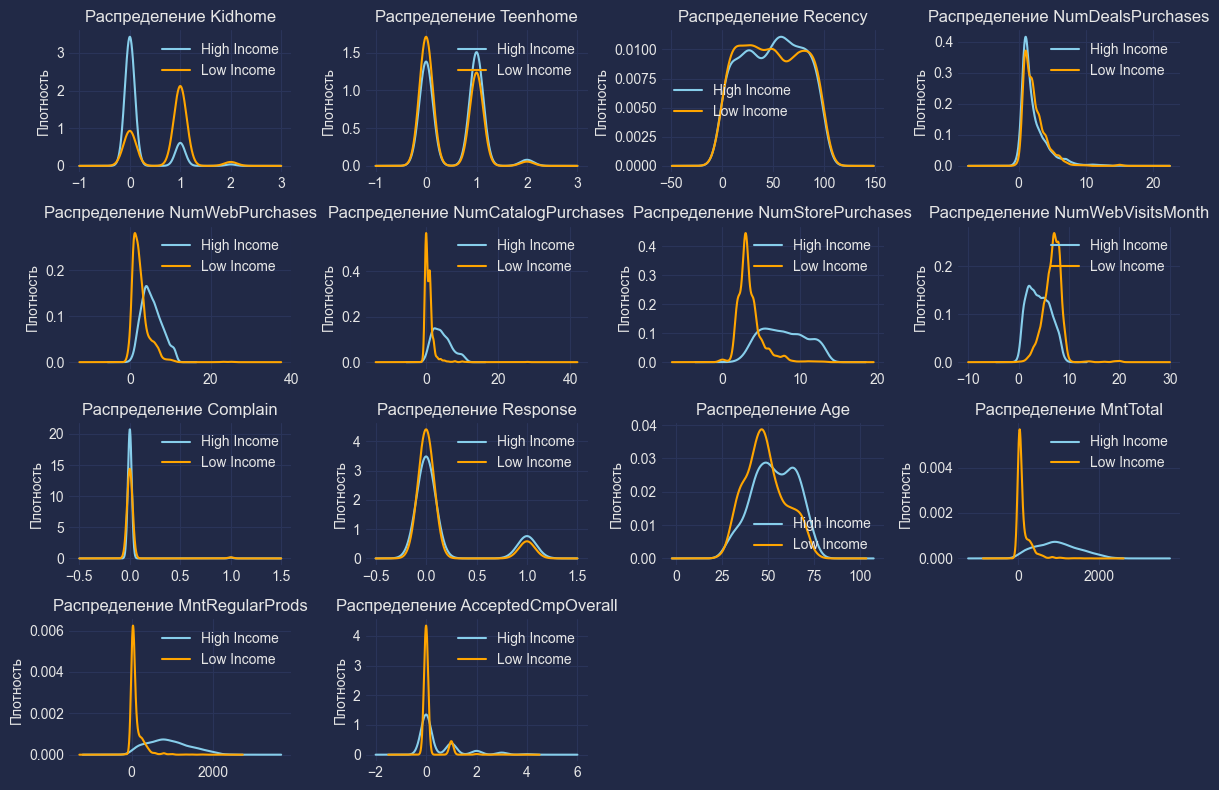

In [34]:
ks_results = {}
for feature in features:
    ks_statistic, p_value = ks_2samp(high_income[feature], low_income[feature])
    ks_results[feature] = {'KS Statistic': ks_statistic, 'P-Value': p_value}

for feature, result in ks_results.items():
    print(f"Признак: {feature}, KS Statistic: {result['KS Statistic']}, P-Value: {result['P-Value']}")

# Визуализация различия распределений между группами
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 4, i)
    high_income[feature].plot(kind='density', label='High Income', color='skyblue')
    low_income[feature].plot(kind='density', label='Low Income', color='orange')
    plt.legend()
    plt.ylabel('Плотность')
    plt.title(f'Распределение {feature}')
plt.tight_layout()
plt.show()

Проведенный KS-тест позволил выявить значительные различия в распределениях между группами по большинству признаков. Например, признаки Kidhome и Teenhome демонстрируют статистически значимые различия, указывая на важность этих факторов для сегментации клиентов. Также выявлены существенные различия в распределениях NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Age, MntTotal, MntRegularProds и AcceptedCmpOverall.

Признак Recency не показал статистической значимости в распределении между группами. Это может указывать на то, что время с момента последней покупки не является ключевым фактором для разделения клиентов на различные сегменты.

### PSI

**Population Stability Index (PSI)** - это мера стабильности распределения признаков между двумя группами. Он часто используется для оценки изменений в распределении признаков до и после некоторого события или в разных сегментах данных.

PSI вычисляется с использованием формулы:

\\[
PSI = ∑_{i=1^n} (P_{high},i - P_{low},i) × ln(P_{high},i/P_{low},i)
\\]

Где:
- $P_{high},i$ - доля i-го значения признака в группе high_income
- $P_{low},i$ - доля i-го значения признака в группе low_income
- $n$ - количество уникальных значений признака

PSI оценивается по следующим критериям:
- PSI < 0.1: Незначительные изменения в распределении,
- 0.1 ≤ PSI < 0.25: Умеренные изменения,
- PSI ≥ 0.25: Значительные изменения.

Ниже вычисляем PSI для каждого числового признака между группами high_income и low_income, чтобы определить, какие признаки сильно отличаются между этими группами по доходу.

In [35]:
psi_results = {}
for feature in features:
    high_counts = high_income[feature].value_counts(normalize=True)
    low_counts = low_income[feature].value_counts(normalize=True)

    # Объединение индексов для корректного расчета PSI
    all_index = high_counts.index.union(low_counts.index)

    psi_values = (high_counts.reindex(all_index, fill_value=0) - low_counts.reindex(all_index, fill_value=0)) * (
            high_counts.reindex(all_index, fill_value=0) - low_counts.reindex(all_index, fill_value=0)).apply(lambda x: 1 if x == 0 else x / 2).apply(lambda x: np.log(x))
    psi = psi_values.sum()

    psi_results[feature] = psi

for feature, psi in psi_results.items():
    print(f"Признак {feature}, PSI: {psi}")

Признак Kidhome, PSI: -0.7088249551745224
Признак Teenhome, PSI: -0.33642840927617323
Признак Recency, PSI: -1.1589573008287153
Признак NumDealsPurchases, PSI: -0.5758864846410907
Признак NumWebPurchases, PSI: -1.814562931772184
Признак NumCatalogPurchases, PSI: -2.3179438757268174
Признак NumStorePurchases, PSI: -2.2723459333741873
Признак NumWebVisitsMonth, PSI: -1.4263508385279882
Признак Complain, PSI: -0.03553016650882425
Признак Response, PSI: -0.2167942736700535
Признак Age, PSI: -1.267316717751038
Признак MntTotal, PSI: -6.212241992207463
Признак MntRegularProds, PSI: -6.367752405869491
Признак AcceptedCmpOverall, PSI: -0.7019180637826867


Наибольшие значения PSI, наблюдаемые для признаков NumCatalogPurchases и NumStorePurchases, указывают на значительные изменения в структуре покупок между этими двумя группами. Это может свидетельствовать о том, что клиенты с разными уровнями дохода предпочитают разные каналы покупок или имеют разные предпочтения по типу товаров.

Другие признаки, такие как MntTotal и MntRegularProds, также демонстрируют высокие значения PSI, что указывает на существенные различия в общей сумме покупок и в сумме, потраченной на обычные товары. Эти результаты могут быть полезны для разработки персонализированных маркетинговых стратегий, учитывающих специфику потребностей и предпочтений клиентов с разными уровнями дохода.

Другие признаки, такие как NumWebPurchases и NumDealsPurchases, также показывают значительные изменения в распределении между группами high_income и low_income. Это может говорить о различиях в онлайн-поведении покупателей с разными уровнями дохода или в их отношении к акционным предложениям.

## 2. Тестирование гипотез относительно разных групп клиентов. Заключение о наличии / отсутствии статистически значимой разницы

Несколько гипотез относительно целевой переменной **Income** и других признаков:

1. Клиенты, совершавшие в среднем меньшее количество покупок через веб-сайт (**NumWebPurchases**), имеют более низкий годовой доход.
2. Клиенты, принимавшие большее количество маркетинговых компаний (**AcceptedCmpOverall**), имеют более высокий годовой доход.
3. Клиенты с более высоким уровнем образования (**education_...**) имеют более высокий годовой доход.
4. Клиенты с более высоким уровнем образования (**education_...**) чаще одиноки (**marital_...**). Есть различия между уровнем образования и семейным положением.
    
Для проверки гипотезы между клиентами с высоким и низким доходом используем T-тест для независимых выборок, чтобы проверить статистическую значимость, также в ходе тестирования последней гипотезы был использован Хи-квадрат.

**T-тест для независимых выборок** - это статистический тест, который используется для сравнения средних значений двух независимых выборок и определения, есть ли статистически значимые различия между ними. Он проверяет гипотезу о равенстве средних значений в двух группах.

Формула для вычисления p-value зависит от того, какой тип теста был выбран (одновыборочный, двувыборочный, связанные выборки и т. д.).

Для двухстороннего теста p-value вычисляется как вероятность получить значения t-статистики, равной или большей по модулю, чем фактическое значение, при условии верности нулевой гипотезы о равенстве средних:
\\[ p = P(|T| > |t|) \\]

**Гипотеза 1:** Клиенты, совершавшие в среднем меньшее количество покупок через веб-сайт (NumWebPurchases), имеют более низкий годовой доход

- **Нулевая гипотеза (H0)**: Среднее количество покупок через веб-сайт одинаково для сегментов high_income и low_income.
- **Альтернативная гипотеза (H1)**: Среднее количество покупок через веб-сайт различается для сегментов high_income и low_income.

In [36]:
t_stat, p_val = stats.ttest_ind(high_income['NumWebPurchases'], low_income['NumWebPurchases'], equal_var=False)

high_income_mean = high_income['NumWebPurchases'].mean()
low_income_mean = low_income['NumWebPurchases'].mean()

# Построим интервальную оценку методом бутстрэпа
def bootstrap_mean_diff(data1, data2, n_bootstrap=1000):
    mean_diffs = []
    for _ in range(n_bootstrap):
        sample1 = np.random.choice(data1, size=len(data1), replace=True)
        sample2 = np.random.choice(data2, size=len(data2), replace=True)
        mean_diffs.append(np.mean(sample1) - np.mean(sample2))
    return mean_diffs

bootstrap_diffs = bootstrap_mean_diff(high_income['NumWebPurchases'], low_income['NumWebPurchases'])
confidence_interval = np.percentile(bootstrap_diffs, [2.5, 97.5])

print("p-value для NumWebPurchases:", p_val)
print("Среднее количество покупок через веб-сайт для high_income:", high_income_mean)
print("Среднее количество покупок через веб-сайт для low_income:", low_income_mean)
print("95% интервальная оценка разницы в средних количествах покупок через веб-сайт:", confidence_interval)

p-value для NumWebPurchases: 3.9814496508501063e-156
Среднее количество покупок через веб-сайт для high_income: 5.442594215600351
Среднее количество покупок через веб-сайт для low_income: 2.622285174693107
95% интервальная оценка разницы в средних количествах покупок через веб-сайт: [2.62386433 3.03516004]


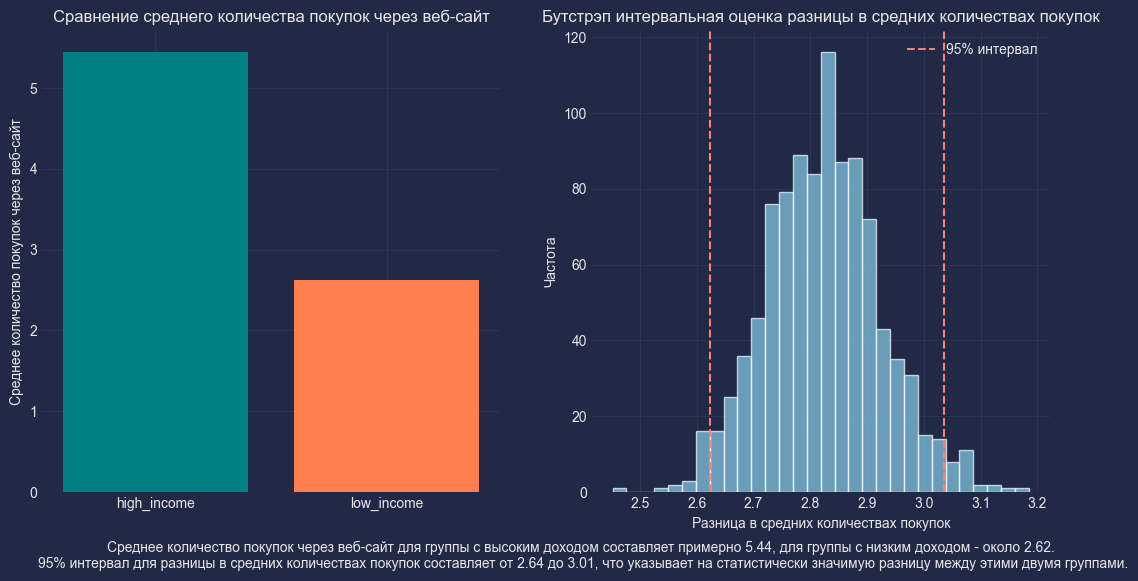

In [37]:
plt.figure(figsize=(13, 6))
plt.subplot(1, 2, 1)
plt.bar(['high_income', 'low_income'], [high_income_mean, low_income_mean], color=['teal', 'coral'])
plt.ylabel('Среднее количество покупок через веб-сайт')
plt.title('Сравнение среднего количества покупок через веб-сайт')

plt.subplot(1, 2, 2)
plt.hist(bootstrap_diffs, bins=30, color='skyblue', alpha=0.7, edgecolor='white')
plt.axvline(confidence_interval[0], color='salmon', linestyle='--', label='95% интервал')
plt.axvline(confidence_interval[1], color='salmon', linestyle='--')
plt.xlabel('Разница в средних количествах покупок')
plt.ylabel('Частота')
plt.title('Бутстрэп интервальная оценка разницы в средних количествах покупок')
plt.legend()

plt.text(2.4, -20, 'Среднее количество покупок через веб-сайт для группы с высоким доходом составляет примерно 5.44, для группы с низким доходом - около 2.62. \n95% интервал для разницы в средних количествах покупок составляет от 2.64 до 3.01, что указывает на статистически значимую разницу между этими двумя группами.', ha='center')
plt.show()

* p-value для NumWebPurchases очень близко к нулю, что гораздо меньше уровня значимости. Это говорит о статистически значимом различии в среднем количестве покупок через веб-сайт между двумя сегментами.
* Среднее количество покупок через веб-сайт для сегмента high_income составляет примерно 5.44, в то время как для сегмента low_income - около 2.62. Таким образом, клиенты с высоким уровнем дохода совершают в среднем более чем в два раза больше покупок через веб-сайт, чем клиенты с низким уровнем дохода.
* 95% интервальная оценка разницы в средних количествах покупок через веб-сайт между сегментами составляет от 2.62 до 3.03. Это означает, что с высокой вероятностью разница в среднем количестве покупок через веб-сайт между двумя сегментами лежит в этом диапазоне.

Существует статистически значимое различие в среднем количестве покупок через веб-сайт между клиентами с высоким и низким уровнем дохода, причем клиенты с высоким уровнем дохода склонны к более активным покупкам через веб-сайт.

**Гипотеза 2:** Клиенты, принимавшие большее количество маркетинговых компаний (AcceptedCmpOverall), имеют более высокий годовой доход.

- **Нулевая гипотеза (H0)**: Среднее количество принятых клиентами маркетинговых компаний одинаково для сегментов high_income и low_income.
- **Альтернативная гипотеза (H1)**: Среднее количество принятых клиентами маркетинговых компаний различно для сегментов high_income и low_income.

In [38]:
t_stat, p_val = stats.ttest_ind(high_income['AcceptedCmpOverall'], low_income['AcceptedCmpOverall'], equal_var=False)

high_income_mean = high_income['AcceptedCmpOverall'].mean()
low_income_mean = low_income['AcceptedCmpOverall'].mean()

# Построим интервальную оценку методом бутстрэпа
def bootstrap_mean_diff(data1, data2, n_bootstrap=1000):
    mean_diffs = []
    for _ in range(n_bootstrap):
        sample1 = np.random.choice(data1, size=len(data1), replace=True)
        sample2 = np.random.choice(data2, size=len(data2), replace=True)
        mean_diffs.append(np.mean(sample1) - np.mean(sample2))
    return mean_diffs

bootstrap_diffs = bootstrap_mean_diff(high_income['AcceptedCmpOverall'], low_income['AcceptedCmpOverall'])
confidence_interval = np.percentile(bootstrap_diffs, [2.5, 97.5])

print("p-value для AcceptedCmpOverall:", p_val)
print("Среднее количество принятых маркетинговых компаний для high_income:", high_income_mean)
print("Среднее количество принятых маркетинговых компаний для low_income:", low_income_mean)
print("95% интервальная оценка разницы в средних количествах принятых маркетинговых компаний:", confidence_interval)

p-value для AcceptedCmpOverall: 2.601477327131874e-39
Среднее количество принятых маркетинговых компаний для high_income: 0.4688869412795793
Среднее количество принятых маркетинговых компаний для low_income: 0.10670443814919736
95% интервальная оценка разницы в средних количествах принятых маркетинговых компаний: [0.31477741 0.41540247]


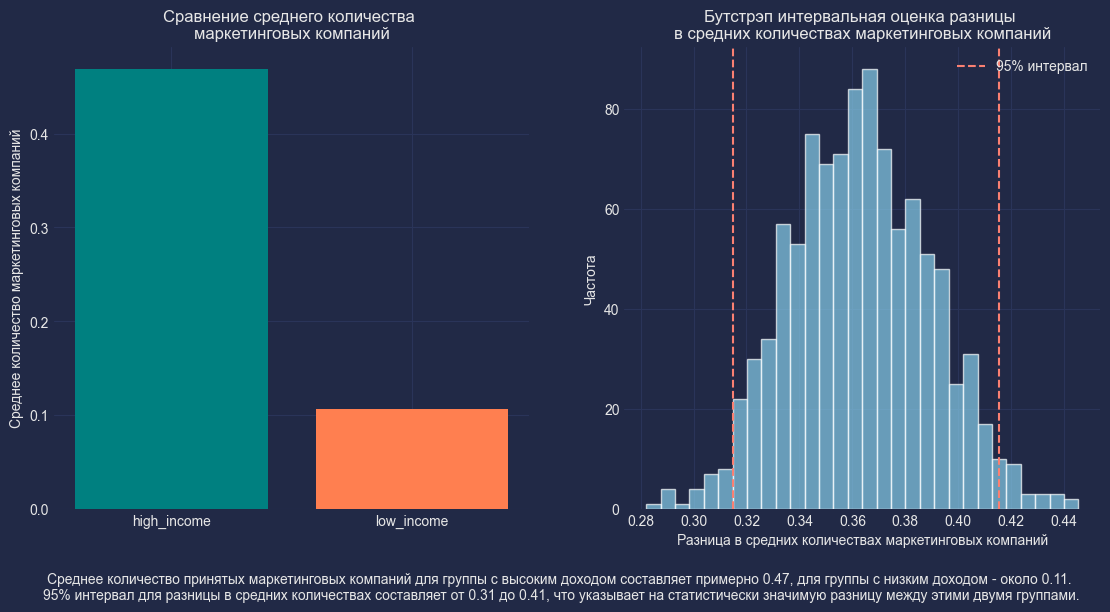

In [39]:
plt.figure(figsize=(13.5, 6))
plt.subplot(1, 2, 1)
plt.bar(['high_income', 'low_income'], [high_income_mean, low_income_mean], color=['teal', 'coral'])
plt.ylabel('Среднее количество маркетинговых компаний')
plt.title('Сравнение среднего количества \nмаркетинговых компаний')

plt.subplot(1, 2, 2)
plt.hist(bootstrap_diffs, bins=30, color='skyblue', alpha=0.7, edgecolor='white')
plt.axvline(confidence_interval[0], color='salmon', linestyle='--', label='95% интервал')
plt.axvline(confidence_interval[1], color='salmon', linestyle='--')
plt.xlabel('Разница в средних количествах маркетинговых компаний')
plt.ylabel('Частота')
plt.title('Бутстрэп интервальная оценка разницы \nв средних количествах маркетинговых компаний')
plt.legend()

plt.text(0.25, -18, 'Среднее количество принятых маркетинговых компаний для группы с высоким доходом составляет примерно 0.47, для группы с низким доходом - около 0.11. \n95% интервал для разницы в средних количествах составляет от 0.31 до 0.41, что указывает на статистически значимую разницу между этими двумя группами.', ha='center')
plt.show()

* Значение p-value для AcceptedCmpOverall меньше стандартного уровня значимости 0.05. Это говорит о статистической значимости различия в средних количествах принятых маркетинговых компаний между клиентами с высоким и низким доходом.

* Среднее количество принятых маркетинговых компаний для клиентов с высоким доходом составляет 0.467, в то время как для клиентов с низким доходом - 0.107. Тем самым отвергаем нулевую гипотезу и подтверждаем предположение. 

* 95% интервальная оценка разницы в средних количествах принятых маркетинговых компаний между клиентами с высоким и низким доходом составляет от 0.315 до 0.415. 

Можно сделать вывод, что уровень дохода клиентов оказывает статистически значимое влияние на количество принятых маркетинговых компаний, причем клиенты с высоким доходом склонны к более активным покупкам через интернет по сравнению с клиентами с низким доходом.

**Гипотеза 3:** Клиенты с более высоким уровнем образования (признак education_...) имеют более высокий годовой доход.
    
- **Нулевая гипотеза (H0)**: Уровень образования клиентов не влияет на их годовой доход.
- **Альтернативная гипотеза (H1)**: Клиенты с более высоким уровнем образования имеют более высокий годовой доход.

In [40]:
def bootstrap_diff(data1, data2, n_iter=1000):
    diff_means = []
    for _ in range(n_iter):
        sample1 = np.random.choice(data1, len(data1), replace=True)
        sample2 = np.random.choice(data2, len(data2), replace=True)
        diff_means.append(np.mean(sample1) - np.mean(sample2))
    return diff_means

In [41]:
# Построение точечной оценки различия между уровнями образования
education_levels = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']
for level in education_levels:
    t_stat, p_val = ttest_ind(high_income[level], low_income[level])
    print(f"\np-value для {level}: {p_val}")

    # Построение интервальной оценки с помощью бутстрэпа
    diff_means = bootstrap_diff(high_income[level], low_income[level])
    ci_low, ci_high = np.percentile(diff_means, [2.5, 97.5])

    print(f"95% доверительный интервал различия в годовом доходе: [{ci_low:.2f}, {ci_high:.2f}]")


p-value для education_2n Cycle: 0.028507287114027818
95% доверительный интервал различия в годовом доходе: [-0.05, -0.00]

p-value для education_Basic: 7.740910991962518e-15
95% доверительный интервал различия в годовом доходе: [-0.06, -0.04]

p-value для education_Graduation: 0.47823205385532885
95% доверительный интервал различия в годовом доходе: [-0.03, 0.06]

p-value для education_Master: 0.6641154923130166
95% доверительный интервал различия в годовом доходе: [-0.04, 0.02]

p-value для education_PhD: 7.31126220403614e-05
95% доверительный интервал различия в годовом доходе: [0.04, 0.10]


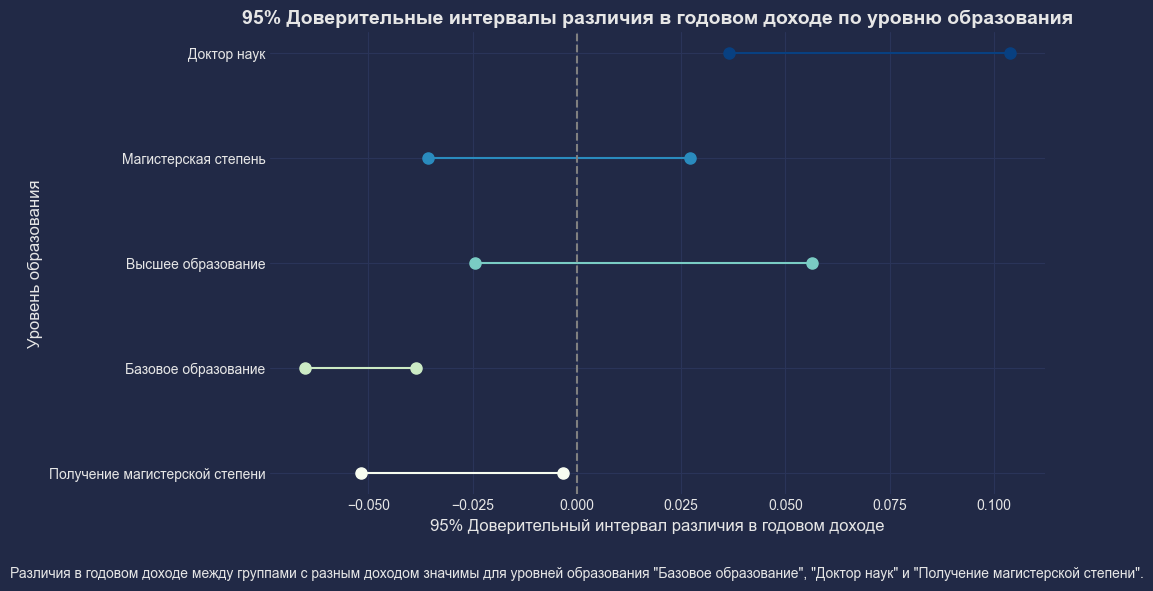

In [42]:
diff_data = []

for level in education_levels:
    diff_means = bootstrap_diff(high_income[level], low_income[level])
    ci_low, ci_high = np.percentile(diff_means, [2.5, 97.5])
    diff_data.append({'Education Level': level, 'CI Low': ci_low, 'CI High': ci_high})

labels = ['Получение магистерской степени', 'Базовое образование', 'Высшее образование', 'Магистерская степень', 'Доктор наук']

plt.figure(figsize=(10, 6))
colors = plt.cm.GnBu(np.linspace(0, 1, len(diff_data))) 
for i, record in enumerate(diff_data):
    plt.plot([record['CI Low'], record['CI High']], [i, i], marker='o', markersize=8, label=labels[i], color=colors[i])

plt.yticks(range(len(diff_data)), [record['Education Level'] for record in diff_data])
plt.gca().set_yticklabels(labels)  
plt.axvline(x=0, color='grey', linestyle='--')
plt.title('95% Доверительные интервалы различия в годовом доходе по уровню образования', fontweight='bold', fontsize=14)
plt.xlabel('95% Доверительный интервал различия в годовом доходе', fontsize=12)
plt.ylabel('Уровень образования', fontsize=12)
plt.text(0, -1, 'Различия в годовом доходе между группами с разным доходом значимы для уровней образования "Базовое образование", "Доктор наук" и "Получение магистерской степени".', ha='center')
plt.show()

* Уровень образования клиентов влияет на их годовой доход. Это подтверждается низким p-value для некоторых уровней образования, что говорит о статистической значимости различий в годовом доходе между группами с разным уровнем образования.

* Клиенты с уровнем базовым уровнем образования имеют самый низкий годовой доход среди всех уровней образования, как видно из отрицательных значений доверительных интервалов различия в годовом доходе для этой группы.

* Клиенты со степенью доктора наук имеют самый высокий годовой доход среди всех уровней образования, как видно из положительных значений доверительных интервалов различия в годовом доходе для этой группы.

* Для клиентов с уровнями «Получение магистерской степени», «Высшее образование» и «Магистерская степень» различия в годовом доходе не являются статистически значимыми, так как p-value превышает общепринятый уровень значимости 0.05.

Таким образом, можно отклонить нулевую гипотезу и принять альтернативную гипотезу о том, что клиенты с более высоким уровнем образования имеют более высокий годовой доход.

**Гипотеза 4:** Клиенты с более высоким уровнем образования (education_) чаще одиноки (marital_). Есть различия между уровнем образования и семейным положением. 

* **Нулевая гипотеза (H0):** Образование и семейное положение независимы.
* **Альтернативная гипотеза (H1):** Образование и семейное положение зависимы между собой. 

**Хи-квадрат тест (chi-square test)** - это статистический тест, который используется для определения наличия статистической зависимости между категориальными переменными. Он основан на сравнении фактических частот наблюдений с ожидаемыми частотами в таблице сопряженности.

Формула для вычисления Хи-квадрат статистики:
\\[ χ^2 = ∑(O_i - E_i)^2/E_i \\]

где:
- \\( O_i \\) - наблюдаемая частота
- \\( E_i \\) - ожидаемая частота

p-value в данном контексте показывает вероятность получить такие же или более экстремальные результаты, если переменные действительно независимы.

In [43]:
data['Marital_Status'] = data[['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']].idxmax(axis=1).str.split('_').str[1]
data['Marital_Status'] = data['Marital_Status'].replace({'Divorced':'Разведен/Разведена','Single':'Одинокий/Одинокая','Married':'Женат/Замужем','Together':'Гражданский брак','Widow':'Вдовец/Вдова'})

In [44]:
data['Marital_Status'].replace({'Разведен/Разведена':'Одинокий','Одинокий/Одинокая':'Одинокий','Женат/Замужем':'В паре','Гражданский брак':'В паре','Вдовец/Вдова':'Одинокий'})

0       Одинокий
1       Одинокий
2         В паре
3         В паре
4         В паре
          ...   
2200      В паре
2201      В паре
2202    Одинокий
2203      В паре
2204      В паре
Name: Marital_Status, Length: 2200, dtype: object

In [45]:
data['Education'] = data[['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']].idxmax(axis=1).str.split('_').str[1]
data['Education'] = data['Education'].replace({'Master': 'Магистерская степень', 'Basic':'Базовое образование','Graduation':'Высшее образование','2n Cycle':'Получение степени','PhD':'Доктор наук'})

In [46]:
Marital_Situation = data[['Education','Marital_Status']]
crosstab = pd.crosstab(Marital_Situation["Education"], Marital_Situation["Marital_Status"])
crosstab

Marital_Status        Вдовец/Вдова  Гражданский брак  Женат/Замужем   
Education                                                             
Базовое образование              1                14             20  \
Высшее образование              35               282            429   
Доктор наук                     24               113            187   
Магистерская степень            11               101            138   
Получение степени                5                56             80   

Marital_Status        Одинокий/Одинокая  Разведен/Разведена  
Education                                                    
Базовое образование                  18                   1  
Высшее образование                  247                 117  
Доктор наук                          98                  52  
Магистерская степень                 77                  37  
Получение степени                    35                  22

In [47]:
del data['Marital_Status']
del data['Education']

In [48]:
labels_education = ['Получение степени', 'Базовое образование', 'Высшее образование', 'Магистерская степень', 'Доктор наук']

fig = px.bar(crosstab, x=crosstab.index, y=crosstab.columns, barmode='stack')
fig.update_layout(
    title='Соотношение семейного положения по уровню образования',
    title_font=dict(size=16, family='Arial', color='black'),
    xaxis={'title': 'Уровень образования', 'tickmode': 'array', 'tickvals': list(range(len(labels_education))), 'ticktext': labels_education},
    yaxis={'title': 'Количество'},
    legend_title='Семейное положение',
    xaxis_tickangle=0, 
    template='plotly_white'
)
                   
fig.show()

Из графика можно сделать следующие выводы: существует определенная зависимость между уровнем образования и семейным положением. Люди с высшим образованием чаще находятся в статусе "Женат/Замужем", в то время как у людей с базовым образованием и теми, кто получает степень, более распространены статусы "Гражданский брак" и "Одинокий/Одинокая". Также можно отметить, что с увеличением уровня образования увеличивается доля людей, находящихся в статусе "Разведен/Разведена". 

In [49]:
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f'Хи-квадрат статистика: {chi2}')
print(f'p-value: {p}')

Хи-квадрат статистика: 16.395194621234964
p-value: 0.4257357561975808


* Хи-квадрат статистика равна 16.4, что говорит о том, что между уровнем образования и семейным положением есть некоторая статистическая связь.
* P-value равно 0.4257, что означает, что вероятность получить такие или более экстремальные результаты при условии верности нулевой гипотезы (об отсутствии связи между образованием и семейным положением) составляет 43.87%. Таким образом, p-value больше уровня значимости 0.05, что не позволяет отвергнуть нулевую гипотезу.
* Наибольшее количество одиноких клиентов наблюдается среди клиентов с высшим образованием - 248 человек, что подтверждает частоту одиночества с уровнем образования.

## 3. Ряд продуктовых гипотез, объясняющих, почему одна группа хуже другой. Предложение экспериментов на отстающей группе для повышения показателей

Исходя из получившихся резальтатов прошлых пунктов, сформулируем несколько продуктовых гипотез, объясняющих почему в большинстве случаев клиенты с более низким уровнем дохода статистически «отстают» от группы клиентов с более высоким годовым доходом:

* **Гипотеза 1:** Недостаточная привлекательность предлагаемых продуктов и ценовая политика может быть фактором, который ограничивает покупки клиентов с низким уровнем дохода. Для проверки этой гипотезы можно предложить провести эксперимент по анализу и пересмотреть ассортимент товаров, ценовую политику и систему скидок для привлечения клиентов с низким уровнем дохода.

* **Гипотеза 2:** Клиенты с высоким уровнем дохода могут быть более склонны к участию в маркетинговых компаниях из-за своего финансового статуса и потребности в дорогих продуктах или услугах. Для проверки этой гипотезы можно провести эксперимент, предлагая клиентам с низким доходом специальные предложения и скидки в рамках маркетинговых компаний.

* **Гипотеза 3:** Недостаточное информирование о продуктах, акциях и специальных предложениях для клиентов с низким уровнем дохода может быть причиной их низкой активности на веб-сайте. Эксперимент по улучшению информационной составляющей и коммуникации с этой группой клиентов может помочь повысить их вовлеченность и число покупок.

* **Гипотеза 4:** Уровень образования клиентов может влиять на их способность к пониманию и использованию онлайн-платформ для покупок. Для проверки этой гипотезы можно разработать образовательные рассылки и короткие туториалы, которые помогут клиентам с низким уровнем образования лучше понимать устройство платформ.

Также из дополнительных экспериментов можно провести следующее: 

* Разделение клиентов на группы по уровню дохода и проведение A/B-тестирования различных маркетинговых стратегий для каждой группы. Например, сравнение эффективности рекламных кампаний или предложений скидок для клиентов с разным уровнем дохода.

* Внедрение программы лояльности с различными уровнями привилегий для клиентов с разным уровнем дохода. Например, предоставление дополнительных скидок или бонусов для клиентов с низким уровнем дохода, чтобы стимулировать их к повторным покупкам.

* Проведение опросов среди клиентов с разным уровнем дохода для выявления их потребностей и предпочтений. На основе полученных данных можно адаптировать ассортимент товаров или услуг, чтобы лучше соответствовать ожиданиям клиентов и увеличить конверсию покупок.

# 📍 Регрессионный анализ

## 1. Оценка модели линейной регрессии методом МНК, подготовка репорта модели и интерпретация коэффициентов

In [50]:
def show_regression_results(dataset, model, target, feature_names):
    """
    Args:
        - dataset: датасет
        - model: объект модели
        - target: целевая переменная
    Функция выводит сводку по модели, вычисляет среднеквадратичную ошибку (MSE) и 
    строит графики для анализа результатов.
    """
    y_pred = model.predict(sm.add_constant(dataset[feature_names]))
        
    # Расчет MSE
    mse = mean_squared_error(dataset[target], y_pred)
    print(f'Mean Squared Error: {mse:.3f}')

    # График истинных значений против предсказанных значений
    plt.figure(figsize=(10, 6))
    plt.scatter(dataset[target], y_pred, color='teal', edgecolor='white', alpha=0.6)
    plt.plot([dataset[target].min(), dataset[target].max()], [dataset[target].min(), dataset[target].max()], '--', lw=2, color='salmon')
    plt.xlabel('Истинные значения', fontsize=12)
    plt.ylabel('Предсказанные значения', fontsize=12)
    plt.title('Истинные vs Предсказанные значения', fontweight='bold', fontsize=14)
    plt.text(45000, -60000, 'Большинство точек лежат близко к диагонали, что свидетельствует о том, что модель хорошо предсказывает истинные значения. \nОднако есть смещение в области значений от 0 до 20 тыс. и несколько выбросов, которые требуют дополнительного анализа.', ha='center')
    plt.grid(True)
    plt.show()
    
    # График соотношения верно предсказанных и истинных значений
    plt.figure(figsize=(10, 6))
    plt.plot(dataset[target], label='Истинные значения', marker='o', color='skyblue', alpha=0.6)
    plt.plot(y_pred, label='Предсказанные значения', marker='x', color='blue', alpha=0.6)
    plt.xlabel('Индекс', fontsize=12)
    plt.ylabel('Значения', fontsize=12)
    plt.title('Истинные vs Предсказанные значения', fontweight='bold', fontsize=14)
    plt.text(1000, -60000, 'Кривые истинных и предсказанных значений практически совпадают, что указывает на высокую точность модели. \nОднако в некоторых областях графика наблюдается небольшое отклонение.', ha='center')
    plt.legend()
    plt.grid(True)
    plt.show()

    # График распределения остатков
    residuals = dataset[target] - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, color='coral', edgecolor='white', alpha=0.6)
    plt.xlabel('Остатки', fontsize=12)
    plt.ylabel('Частота', fontsize=12)
    plt.title('Распределение остатков', fontweight='bold', fontsize=14)
    plt.text(-20000, -40, 'Распределение остатков близко к нормальному, что говорит о том, что модель хорошо справляется с данными. \nНо есть небольшие выбросы в хвостах распределения, что может указывать на неучтенные факторы или шум в данных.', ha='center')
    plt.grid(True)
    plt.show()

def train_model(dataset, target, feature_names, show_results=False, show_plots=False, robust=False):
    """
    Args:
        - dataset: датасет
        - target: целевая переменная
        - feature_names: список названий признаков
        - show_results: вывод репорта 
        - show_plots: вывод графиков
        - robust: гетероскедастично-устойчивая оценка дисперсии
    Функция строит линейную регрессионную модель и возвращает объект модели.
    """
    
    dataset = dataset.copy()

    X = sm.add_constant(dataset[feature_names])
    
    if robust == True:
        model = sm.OLS(dataset[target], X).fit(cov_type='HC3')
    else:
        model = sm.OLS(dataset[target], X).fit()
    
    dataset[f'{target}_hat'] = model.fittedvalues
    dataset['residuals'] = model.resid
    
    if show_results:
        print(model.summary())
    
    if show_plots:
        show_regression_results(dataset, model, target, feature_names)
    
    return(dataset, model)

In [51]:
# Получаем список всех названий столбцов
all_columns = data.columns.tolist()

# Удаляем столбец 'Income' из списка
columns_except_income = [col for col in all_columns if col != 'Income']

print(columns_except_income)

['Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response', 'Age', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall']


                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     458.2
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:56:51   Log-Likelihood:                -23070.
No. Observations:                2200   AIC:                         4.619e+04
Df Residuals:                    2177   BIC:                         4.632e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.837e+04 

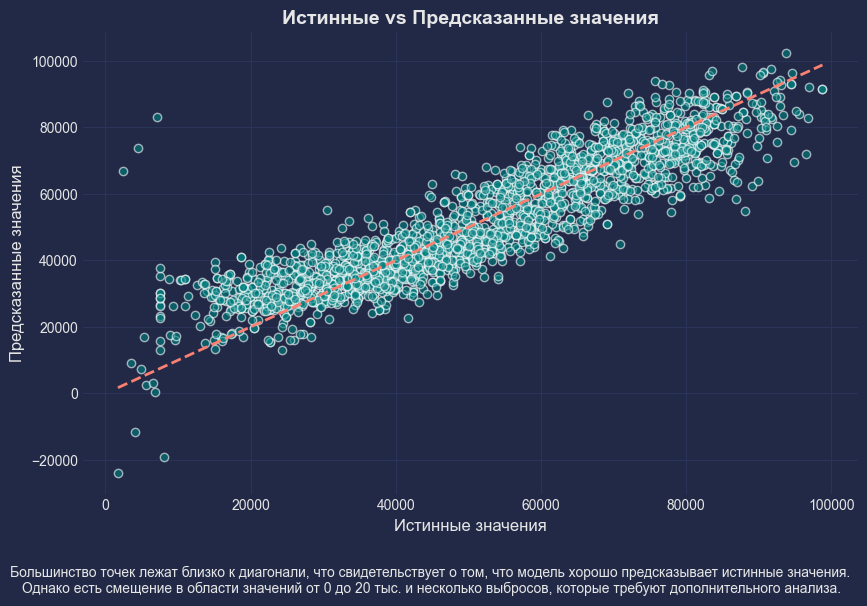

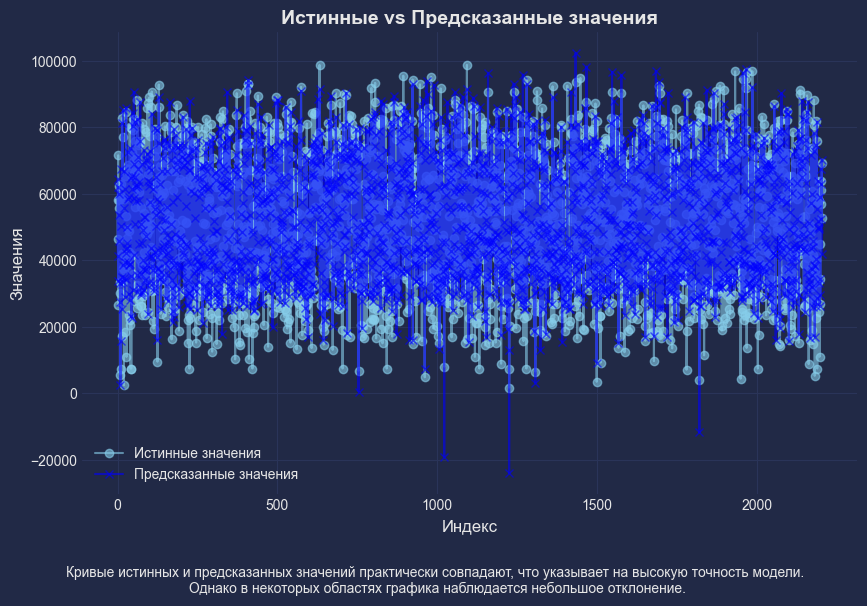

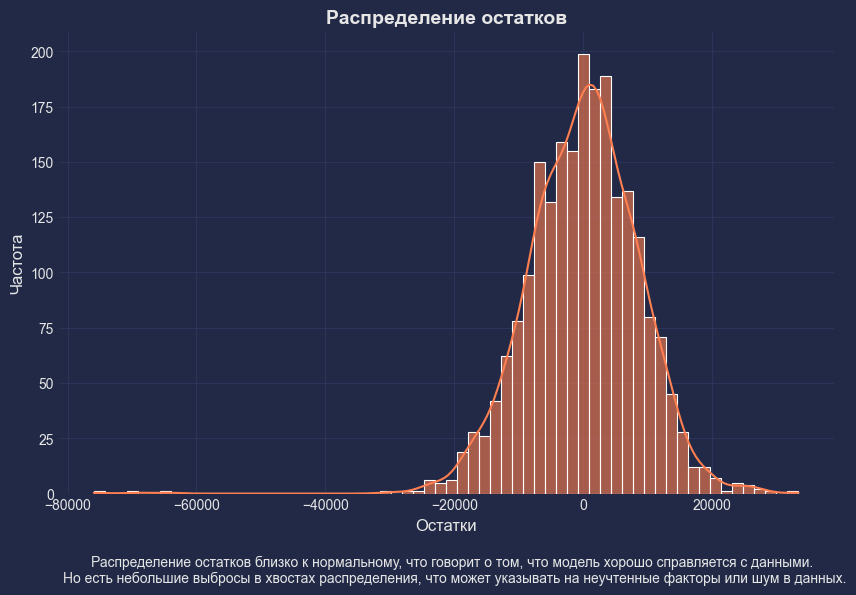

In [52]:
model_linear = train_model(data, target='Income', feature_names=columns_except_income,
                                 show_results=True, show_plots=True)

Из представленного отчета по регрессионному анализу можно сделать следующие выводы:

* R-квадрат: Значение 0.822 указывает на то, что модель объясняет примерно 82.2% дисперсии зависимой переменной (Income), что говорит о хорошем качестве модели.

* Коэффициенты:
   - Kidhome: Увеличение количества детей до 18 лет в доме на единицу приводит к увеличению дохода на 2451.
   - Teenhome: Увеличение количества подростков от 18 до 25 лет на единицу приводит к увеличению дохода на 5991.
   - NumWebVisitsMonth: Увеличение числа посещений веб-сайта в месяц на единицу приводит к уменьшению дохода на 2644.
   - MntTotal: Увеличение общих затрат на продукцию на единицу приводит к увеличению дохода на почти 19.
   - education_Graduation, education_Master, education_PhD: Присутствие высшего образования положительно влияет на доход.
   - Recency: Увеличение периода времени с последней покупки на единицу приводит к уменьшению дохода на 6. Это может указывать на то, что чем дольше прошло с последней покупки, тем меньше доход.
   - Age: Люди старшего возраста ожидаемо имеют более высокий доход.
   - AcceptedCmpOverall: Принятие маркетинговых кампаний в целом приводит к увеличению дохода — участие в маркетинговых кампаниях может способствовать росту дохода.
   - NumDealsPurchases: Увеличение числа сделок покупок на единицу приводит к уменьшению дохода. 
   - Complain и Response: Наличие жалобы и участие в маркетинговых акциях не оказывает статистически значимого влияния на доход. 
   
* Статистическая значимость коэффициентов:
   - Большинство коэффициентов имеют статистически значимые значения (p-value < 0.05), что позволяет считать их важными для модели.
   
* Прочее:
   - Omnibus и Jarque-Bera: Значения указывают на то, что остатки модели не распределены нормально.
   - Durbin-Watson: Значение близко к 2, что указывает на отсутствие автокорреляции в остатках.
   
Исходя из оценок коэффициентов, можно сделать вывод, что факторы, такие как количество детей и подростков в семье, посещения веб-сайта, образование и общие затраты на продукцию, оказывают значительное влияние на доход. Важно обратить внимание на несколько факторов, таких как количество дней с момента последней покупки (Recency) и cумма, потраченная на обычные продукты без учета акций и скидок (MntRegularProds), которые имеют низкую статистическую значимость. 

## 2. Тесты на гетероскедастичность, мультиколлинеарность

**Предпосылки Гаусса-Маркова** включают в себя независимость ошибок, нормальное распределение ошибок, гомоскедастичность (одинаковая дисперсия ошибок) и отсутствие мультиколлинеарности. Проверка помогает удостовериться, что данные соответствуют части предпосылок.

**Гетероскедастичность** означает, что дисперсия ошибок модели изменяется в зависимости от значений предикторов. Тест Уайта используется для проверки гетероскедастичности остатков в коде ниже. Если нулевая гипотеза о гомоскедастичности (случай, при котором стандартное отклонение ошибки модели 𝜀 постоянно и не зависит от регрессоров 𝑥i) отвергается (p-value меньше уровня значимости), то это указывает на наличие гетероскедастичности.

**Мультиколлинеарность** возникает, когда два или более предиктора в модели сильно коррелированы между собой. Это может вызвать проблемы с оценками коэффициентов и их интерпретацией. Фактор инфляции дисперсии (VIF) используется для оценки этой проблемы. Высокие значения VIF (обычно больше 10) указывают на проблемы с мультиколлинеарностью.

White test p-value: 7.42101548974012e-223
Variance Inflation Factor (VIF):                 features         VIF
0                  const    0.000000
1                Kidhome    1.887212
2               Teenhome    1.551820
3                Recency    1.062776
4      NumDealsPurchases    1.687547
5        NumWebPurchases    1.998018
6    NumCatalogPurchases    3.092991
7      NumStorePurchases    2.425640
8      NumWebVisitsMonth    2.023709
9               Complain    1.007590
10              Response    1.432970
11                   Age    1.314140
12      marital_Divorced         inf
13       marital_Married         inf
14        marital_Single         inf
15      marital_Together         inf
16         marital_Widow         inf
17    education_2n Cycle         inf
18       education_Basic         inf
19  education_Graduation         inf
20      education_Master         inf
21         education_PhD         inf
22              MntTotal  184.903728
23       MntRegularProds  170.023802


C:\my_python\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning:

divide by zero encountered in scalar divide

C:\my_python\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning:

divide by zero encountered in scalar divide



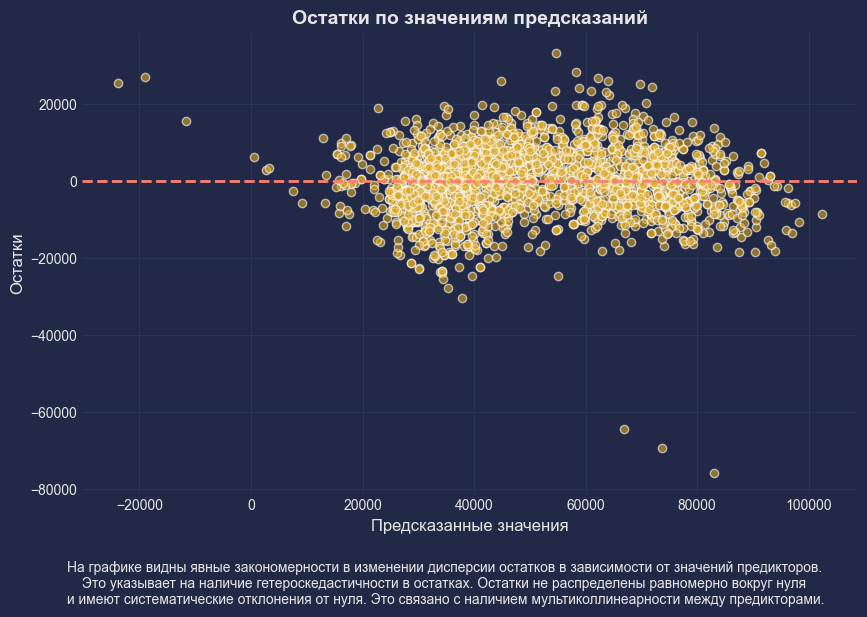

In [53]:
# Тест на гетероскедастичность - White test
_, model = model_linear
residuals = model.resid
fitted_values = model.fittedvalues
het_test = sms.het_white(residuals, model.model.exog)
print(f'White test p-value: {het_test[1]}')

# Тест на мультиколлинеарность - VIF
vif = pd.DataFrame()
vif['features'] = model.model.exog_names
vif['VIF'] = [variance_inflation_factor(model.model.exog, i) for i in range(model.model.exog.shape[1])]
print(f'Variance Inflation Factor (VIF): {vif}')

# График остатков по значениям предсказаний
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, color='goldenrod', edgecolor='white', alpha=0.6)
plt.axhline(y=0, color='salmon', linestyle='--', lw=2)
plt.xlabel('Предсказанные значения', fontsize=12)
plt.ylabel('Остатки', fontsize=12)
plt.title('Остатки по значениям предсказаний', fontweight='bold', fontsize=14)
plt.text(35000, -110000, 'На графике видны явные закономерности в изменении дисперсии остатков в зависимости от значений предикторов. \nЭто указывает на наличие гетероскедастичности в остатках. Остатки не распределены равномерно вокруг нуля \nи имеют систематические отклонения от нуля. Это связано с наличием мультиколлинеарности между предикторами.', ha='center')
plt.grid(True)
plt.show()

* P-значение теста на гетероскедастичность очень мало, что говорит о статистически значимом наличии гетероскедастичности в остатках модели. Это может означать, что дисперсия ошибок не постоянна.

* Большинство признаков имеют низкие значения VIF (менее 10), что хорошо с точки зрения мультиколлинеарности. Однако, признаки marital_Divorced, marital_Married, marital_Single, marital_Together, marital_Widow, education_2n Cycle, education_Basic, education_Graduation, education_Master, education_PhD имеют значение VIF равное бесконечности. Это может быть вызвано линейной зависимостью между этими переменными или ошибкой в обработке данных. Признаки MntTotal и MntRegularProds имеют очень высокие значения VIF (≈184 и ≈170 соответственно), что указывает на серьезную мультиколлинеарность между этими признаками.

### Спецификация №1

**Исключение лишних переменных:** удаляем статистически незначимые факторы (Recency, Complain), зависимые признаки с флагом marital_... и признак MntRegularProds. Относительно последнего выбора — как было выявлено при построении тепловой карты в п. Разведочный анализ данных, MntTotal и MntRegularProds имеют сильную корреляцию, оставляем один из признаков, поскольку второй также был выявлен как статистически незначимый, у нас есть основание оставить признак MntTotal.

In [54]:
data = data.drop(['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow',
                  'Recency', 'Complain', 'MntRegularProds'], axis=1)

# Обновляем список столбцов после удаления
columns_except_income = [col for col in data.columns if col != 'Income']

**Регуляризация:** используем Lasso, которое помогает сократить влияние коррелированных признаков путем добавления штрафа к функции потерь.

**Стандартизация числовых признаков:** сначала был выбран набор числовых признаков из данных, затем был создан numeric_transformer, включающий в себя этап стандартизации данных с помощью StandardScaler(). 

**Преобразование признаков:** был создан preprocessor, который использует ColumnTransformer для преобразования числовых признаков с помощью numeric_transformer.

**Создание Pipeline:** был создан Pipeline, включающий в себя предобработку данных с помощью preprocessor и модель Lasso регрессии с параметром регуляризации alpha=0.1.

In [55]:
numeric_features = data[columns_except_income].select_dtypes(include=['int64']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

# Создание Pipeline с предобработкой данных и моделью Lasso
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=0.1))  
])

pipeline.fit(data[columns_except_income], data['Income'])

C:\my_python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.590e+08, tolerance: 9.311e+07



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Age', 'education_2n Cycle', 'education_Basic',
       'education_Graduation', 'education_Master', 'education_PhD', 'MntTotal',
       'AcceptedCmpOverall'],
      dtype='object'))])),
                ('lasso', Lasso(alpha=0.1))])

C:\my_python\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning:

divide by zero encountered in scalar divide

C:\my_python\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning:

divide by zero encountered in scalar divide



                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     673.2
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:56:54   Log-Likelihood:                -23072.
No. Observations:                2200   AIC:                         4.618e+04
Df Residuals:                    2184   BIC:                         4.627e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.298e+04 

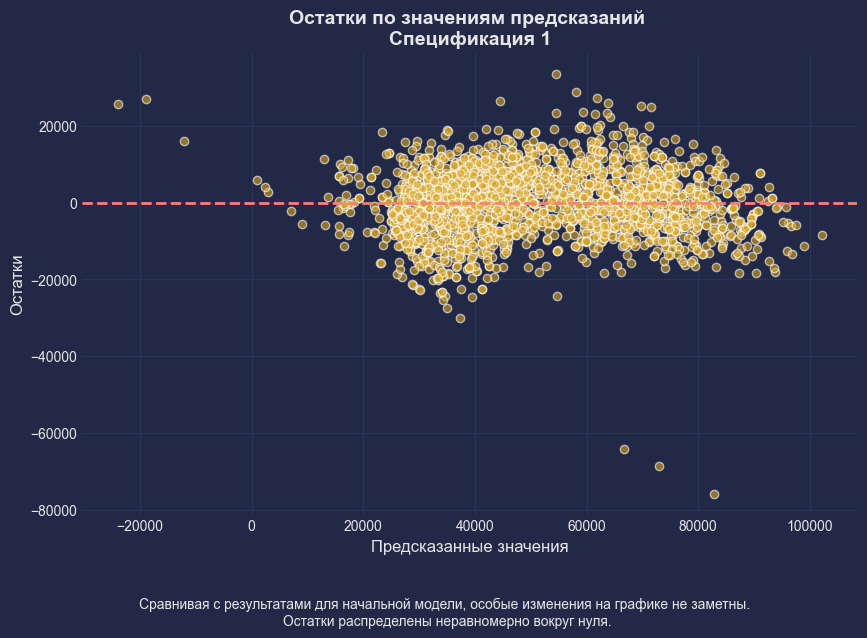

In [56]:
model_linear_1 = train_model(data, target='Income', feature_names=columns_except_income, show_results=True)

_, model = model_linear_1
residuals = model.resid
fitted_values = model.fittedvalues

vif = pd.DataFrame()
vif['features'] = model.model.exog_names
vif['VIF'] = [variance_inflation_factor(model.model.exog, i) for i in range(model.model.exog.shape[1])]
print(f'Variance Inflation Factor (VIF): {vif}')

# График остатков по значениям предсказаний
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, color='goldenrod', edgecolor='white', alpha=0.6)
plt.axhline(y=0, color='salmon', linestyle='--', lw=2)
plt.xlabel('Предсказанные значения', fontsize=12)
plt.ylabel('Остатки', fontsize=12)
plt.title('Остатки по значениям предсказаний \nСпецификация 1', fontweight='bold', fontsize=14)
plt.text(35000, -110000, 'Сравнивая с результатами для начальной модели, особые изменения на графике не заметны. \nОстатки распределены неравномерно вокруг нуля.', ha='center')
plt.grid(True)
plt.show()

Признаки education_Graduation, education_Master и education_PhD по-прежнему указывают на значение бесконечности. Признак же MntTotal сильно понизил значение VIF (с ≈184 до ≈ 4.5), что указывает на положительную относительно проблемы мультиколлинеарности работу спецификации модели.

### Спецификация №2

**Кластеризация признаков:** объединим признаки, соответствующие уровню образования, в один более обобщенный признак.

In [57]:
# Создание нового признака education_level
data['Education_level'] = 0
data.loc[data['education_2n Cycle'] == 1, 'Education_level'] = 1
data.loc[data['education_Basic'] == 1, 'Education_level'] = 2
data.loc[data['education_Graduation'] == 1, 'Education_level'] = 3
data.loc[data['education_Master'] == 1, 'Education_level'] = 4
data.loc[data['education_PhD'] == 1, 'Education_level'] = 5

# Удаление исходных бинарных признаков education_...
data.drop(['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD'], axis=1, inplace=True)

# Обновляем список столбцов после удаления
columns_except_income = [col for col in data.columns if col != 'Income']

**Обработка признака:** логарифмирование выделяющегося признака MntTotal и удаление выбросов. 

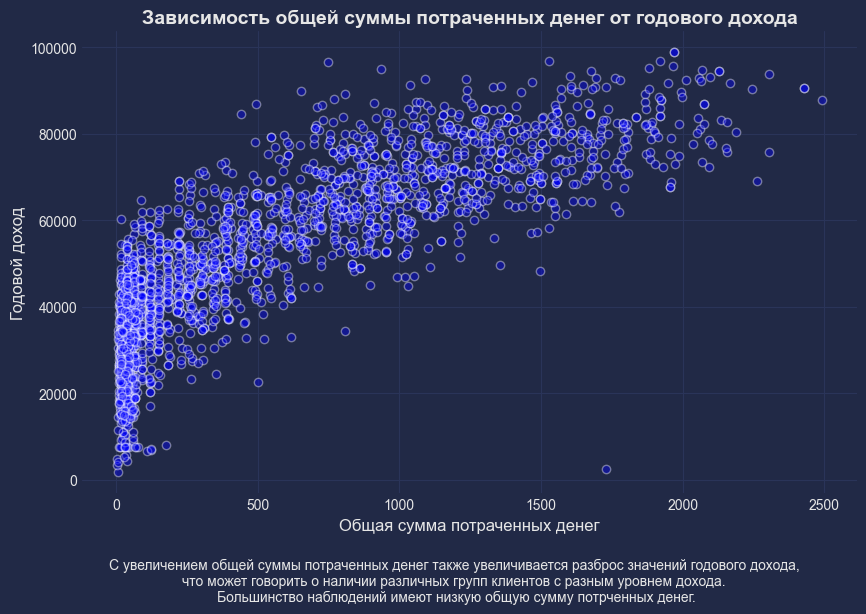

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(data['MntTotal'], data['Income'], color='blue', edgecolor='white', alpha=0.4)
plt.title('Зависимость общей суммы потраченных денег от годового дохода', fontsize=14, fontweight='bold')
plt.xlabel('Общая сумма потраченных денег', fontsize=12)
plt.ylabel('Годовой доход', fontsize=12)
plt.text(1200, -28000, 'С увеличением общей суммы потраченных денег также увеличивается разброс значений годового дохода, \nчто может говорить о наличии различных групп клиентов с разным уровнем дохода. \nБольшинство наблюдений имеют низкую общую сумму потрченных денег.', ha='center')
plt.grid(True)
plt.show()

In [59]:
# Удаляем выбросы из столбца 'Income'
data_cleaned = remove_outliers_iqr(data, 'MntTotal')

# Проверяем количество выбросов
outliers_removed = len(data) - len(data_cleaned)
print(f'Удалено {outliers_removed} строки с выбросами.')

Удалено 3 строки с выбросами.


In [60]:
data['MntTotal'] = data['MntTotal'].apply(lambda x: np.log(x) if x > 0 else 0)

**Удаление признака:** NumCatalogPurchases значительно выделялся в первой спецификации на фоне других каналов совершения покупок.

In [61]:
data.drop(['NumCatalogPurchases'], axis=1, inplace=True)
columns_except_income = [col for col in data.columns if col != 'Income']

**Гетероскедастично-устойчивая оценка дисперсии:** для устранения гетероскедастичности можно использовать гетероскедастично-устойчивую оценку дисперсии, например, White's Heteroskedasticity Consistent Standard Errors.

HC0, HC1, HC2 и HC3 — это различные корректировки для оценки стандартных ошибок коэффициентов в модели линейной регрессии с учетом гетероскедастичности. Используем HC3 — четвертую и наиболее эффективную коррекция, которая учитывает гетероскедастичность наиболее точно из всех вариантов.

При использовании коррекции в модели линейной регрессии получим более точные стандартные ошибки коэффициентов.

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     861.4
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:56:55   Log-Likelihood:                -22908.
No. Observations:                2200   AIC:                         4.584e+04
Df Residuals:                    2188   BIC:                         4.591e+04
Df Model:                          11                                         
Covariance Type:                  HC3                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                798.3524   2727

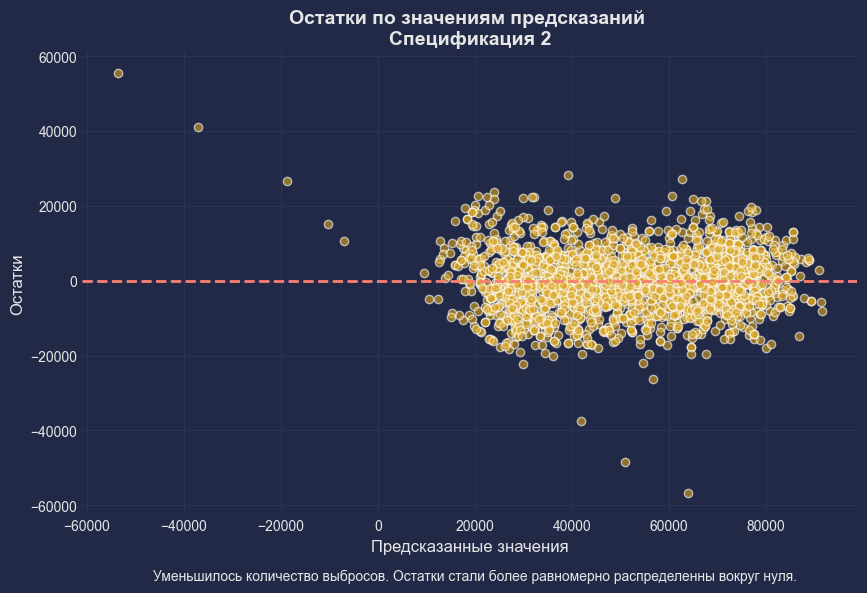

In [62]:
model_linear_2 = train_model(data, target='Income', feature_names=columns_except_income, show_results=True, robust=True)

_, model = model_linear_2
residuals = model.resid
fitted_values = model.fittedvalues

vif = pd.DataFrame()
vif['features'] = model.model.exog_names
vif['VIF'] = [variance_inflation_factor(model.model.exog, i) for i in range(model.model.exog.shape[1])]
print(f'Variance Inflation Factor (VIF): {vif}')

# График остатков по значениям предсказаний
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, color='goldenrod', edgecolor='white', alpha=0.6)
plt.axhline(y=0, color='salmon', linestyle='--', lw=2)
plt.xlabel('Предсказанные значения', fontsize=12)
plt.ylabel('Остатки', fontsize=12)
plt.title('Остатки по значениям предсказаний \nСпецификация 2', fontweight='bold', fontsize=14)
plt.text(20000, -80000, 'Уменьшилось количество выбросов. Остатки стали более равномерно распределенны вокруг нуля.', ha='center')
plt.grid(True)
plt.show()

### Сравнение спецификаций

Сравнивая спецификации двух моделей регрессии, видно следующее:

**Спецификация 1:**
- R-квадрат: 0.822
- Скорректированный R-квадрат: 0.820
- F-статистика: 671.9
- AIC: 4.632e+04
- BIC: 4.641e+04
- Количество наблюдений: 2205
- Количество переменных модели: 15

В спецификации 1 переменные Kidhome, Teenhome, NumDealsPurchases, NumWebPurchases, NumStorePurchases, NumWebVisitsMonth, Age, education_2n Cycle, education_Basic, education_Graduation, education_Master, education_PhD, MntTotal и AcceptedCmpOverall оказывают статистически значимое влияние на зависимую переменную.

**Спецификация 2:**
- R-квадрат: 0.847
- Скорректированный R-квадрат: 0.846
- F-статистика: 861.4
- AIC: 4.584e+04
- BIC: 4.591e+04
- Количество наблюдений: 2200
- Количество переменных модели: 11

В спецификации 2 переменные Kidhome, Teenhome, NumDealsPurchases, NumWebVisitsMonth, Age, MntTotal, AcceptedCmpOverall и MntTotal_log оказывают статистически значимое влияние на зависимую переменную.

Модель второй спецификации выбрана, потому что у неё более высокие значения R-квадрата и скорректированного R-квадрата, что указывает на лучшую объясняющую способность модели по сравнению с первой спецификацией. Кроме того, F-статистика во второй модели также выше, что говорит о более сильной связи между объясняющими переменными и зависимой переменной.

Различия между моделями заключаются в количестве переменных (11 против 15) и значениях информационных критериев AIC и BIC, которые во второй модели ниже, что свидетельствует о лучшей подгонке модели к данным и меньшей потери информации.

В обеих моделях переменные Kidhome и Teenhome имеют высокие коэффициенты и статистически значимые p-значения, что говорит о значительном влиянии количества детей разных возрастов на целевую переменную.

В спецификации 1 переменная NumWebPurchases оказывает статистически незначимое влияние на зависимую переменную, в то время как в спецификации 2 она также имеет низкий коэффициент, но уже статистически значимый.

В спецификации 2 добавлена переменная Education_level с граничным уровнем значимости (p-value = 0.058), что может указывать на её потенциальное влияние на целевую переменную.

Вторая спецификация модели регрессии содержит меньше переменных, но при этом сохраняет высокий уровень объясняющей способности и значимость коэффициентов. Таким образом, можно сделать вывод, что вторая спецификация модели регрессии является предпочтительной и выбрана как финальная.

Проведенные шаги во второй спецификации модели регрессии позволили улучшить качество модели и сделать ее более надежной. Кластеризация признаков, удаление выбросов, логарифмирование значений и лишних признаков, а также использование гетероскедастично-устойчивой оценки дисперсии способствовали уменьшению стандартного отклонения ошибки модели. Кроме того, эти шаги помогли уменьшить корреляцию между факторами модели, что в свою очередь способствует более точной оценке влияния каждого фактора на целевую переменную.

# Заключение

В ходе исследования был проведен анализ датасета, оценены распределения признаков и выявлены различия между группами клиентов. Были сформулированы и протестированы гипотезы о различиях сегментов клиентов. **Для увеличения активности и повышения количества совершаемых покупок для группы клиентов с низким доходом предложено проведение экспериментов по оптимизации ассортимента товаров, ценовой политики, удобства использования веб-сайта и информационной поддержки.**

Далее была построена модель линейной регрессии, которая была оценена и протестирована на соответствие предпосылкам. Выводы по финальной спецификации модели: 

* Влияние количества детей и подростков: Коэффициенты Kidhome и Teenhome имеют положительное влияние на доход, что может указывать на то, что семьи с детьми и подростками могут иметь более высокий уровень дохода. Это может быть связано с дополнительными расходами на уход за детьми, образование и другие потребности.

* Число посещений веб-сайта: Увеличение числа посещений веб-сайта в месяц приводит к уменьшению дохода. Это может быть связано с тем, что чаще посещающие сайт потенциальные клиенты могут быть более ценными и тратить меньше времени на онлайн-покупки.

* Образование: Присутствие высшего образования (Graduation, Master, PhD) оказывает положительное влияние на доход. Это может указывать на то, что люди с более высоким уровнем образования имеют более высокий доход из-за лучших возможностей трудоустройства и карьерного роста.

* Общее количество принятых маркетинговых компаний: увеличение приводит к увеличению дохода также.

**Исходя из анализа, бизнесу стоит обращать внимание на семейное положение клиентов (количество детей и подростков), их образование, активность на веб-сайте и общее количество принятых маркетинговых компаний. Эти факторы могут помочь определить целевую аудиторию, разрабатывать персонализированные маркетинговые стратегии и улучшать обслуживание клиентов.**

Относительно создания модели линейной регрессии и тестирования на соответствие предпоссылок Гаусса-Маркова выявлено положительное влияние следующих инструментов: кластеризация признаков, логарифмирование значений, удаление выбросов и лишних признаков, использование робастных оценок, регуляризация,  стандартизация числовых признаков.

Дальнейшее развитие этой работы может включать в себя более глубокий анализ факторов, влияющих на доход клиентов, и дальнейшее улучшение модели для более точных прогнозов.